# Helioseismic constraints on nuclear reaction rates 

**Author**: Earl Patrick Bellinger$^1$ ( bellinger@phys.au.dk )

$^1$*Stellar Astrophysics Centre, Aarhus University, Denmark*

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

from uncertainties import ufloat, unumpy, umath

from scipy.interpolate import interp1d

import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider

import io

In [2]:
import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
#plt.style.use(os.environ['SCRIPTS_DIR'] + '/matplotlibrc')
plt.style.use('thinfig')

In [3]:
from ratios import *

## Load model and observed data and calculate rates 

In [4]:
# standard solar model 
DF = pd.read_table('std2/calibrate.freqs', sep='\s+', comment='#',
    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
DF

,l,n,nu,E,n_p,n_g
0,0,1,257.869627,4.673597e-04,1,0
1,0,2,403.413252,9.777538e-05,2,0
2,0,3,535.079682,2.385964e-05,3,0
3,0,4,679.484634,7.168617e-06,4,0
4,0,5,824.190764,2.450798e-06,5,0
...,...,...,...,...,...,...
140,3,29,4323.692430,2.128566e-10,29,0
141,3,30,4461.887590,1.970491e-10,30,0
142,3,31,4599.922960,1.807150e-10,31,0
143,3,32,4737.488690,1.631933e-10,32,0


In [5]:
r02s = r02(DF)
r13s = r13(DF)
r02s

{'names': ['r02_2',
  'r02_3',
  'r02_4',
  'r02_5',
  'r02_6',
  'r02_7',
  'r02_8',
  'r02_9',
  'r02_10',
  'r02_11',
  'r02_12',
  'r02_13',
  'r02_14',
  'r02_15',
  'r02_16',
  'r02_17',
  'r02_18',
  'r02_19',
  'r02_20',
  'r02_21',
  'r02_22',
  'r02_23',
  'r02_24',
  'r02_25',
  'r02_26',
  'r02_27',
  'r02_28',
  'r02_29',
  'r02_30',
  'r02_31',
  'r02_32',
  'r02_33',
  'r02_34'],
 'modes': {'nu_0_10',
  'nu_0_11',
  'nu_0_12',
  'nu_0_13',
  'nu_0_14',
  'nu_0_15',
  'nu_0_16',
  'nu_0_17',
  'nu_0_18',
  'nu_0_19',
  'nu_0_2',
  'nu_0_20',
  'nu_0_21',
  'nu_0_22',
  'nu_0_23',
  'nu_0_24',
  'nu_0_25',
  'nu_0_26',
  'nu_0_27',
  'nu_0_28',
  'nu_0_29',
  'nu_0_3',
  'nu_0_30',
  'nu_0_31',
  'nu_0_32',
  'nu_0_33',
  'nu_0_34',
  'nu_0_4',
  'nu_0_5',
  'nu_0_6',
  'nu_0_7',
  'nu_0_8',
  'nu_0_9',
  'nu_1_1',
  'nu_1_10',
  'nu_1_11',
  'nu_1_12',
  'nu_1_13',
  'nu_1_14',
  'nu_1_15',
  'nu_1_16',
  'nu_1_17',
  'nu_1_18',
  'nu_1_19',
  'nu_1_2',
  'nu_1_20',
  'nu

In [6]:
# observed solar data 
obs_DF = pd.read_table('Sun-freqs.dat', sep='\s+')
obs_DF

,n,l,nu,dnu
0,6,0,972.613,0.002
1,7,1,1185.592,0.004
2,8,0,1263.162,0.012
3,8,1,1329.629,0.004
4,8,2,1394.680,0.011
...,...,...,...,...
74,26,2,3839.717,0.144
75,27,0,3846.993,0.177
76,27,1,3913.570,0.068
77,27,2,3976.930,0.298


In [7]:
obs_r02s = r02(obs_DF)
obs_r02s

{'names': ['r02_9',
  'r02_10',
  'r02_11',
  'r02_12',
  'r02_13',
  'r02_14',
  'r02_15',
  'r02_16',
  'r02_17',
  'r02_18',
  'r02_19',
  'r02_20',
  'r02_21',
  'r02_22',
  'r02_23',
  'r02_24',
  'r02_25',
  'r02_26',
  'r02_27'],
 'modes': {'nu_0_10',
  'nu_0_11',
  'nu_0_12',
  'nu_0_13',
  'nu_0_14',
  'nu_0_15',
  'nu_0_16',
  'nu_0_17',
  'nu_0_18',
  'nu_0_19',
  'nu_0_20',
  'nu_0_21',
  'nu_0_22',
  'nu_0_23',
  'nu_0_24',
  'nu_0_25',
  'nu_0_26',
  'nu_0_27',
  'nu_0_9',
  'nu_1_10',
  'nu_1_11',
  'nu_1_12',
  'nu_1_13',
  'nu_1_14',
  'nu_1_15',
  'nu_1_16',
  'nu_1_17',
  'nu_1_18',
  'nu_1_19',
  'nu_1_20',
  'nu_1_21',
  'nu_1_22',
  'nu_1_23',
  'nu_1_24',
  'nu_1_25',
  'nu_1_26',
  'nu_1_27',
  'nu_1_8',
  'nu_1_9',
  'nu_2_10',
  'nu_2_11',
  'nu_2_12',
  'nu_2_13',
  'nu_2_14',
  'nu_2_15',
  'nu_2_16',
  'nu_2_17',
  'nu_2_18',
  'nu_2_19',
  'nu_2_20',
  'nu_2_21',
  'nu_2_22',
  'nu_2_23',
  'nu_2_24',
  'nu_2_25',
  'nu_2_26',
  'nu_2_8',
  'nu_2_9'},
 'fr

In [8]:
perturb = get_ratios(r02, obs_DF, n_perturb=100, seed=0, progress=True)
std_r02s = np.std(perturb, axis=0)
std_r02s

100%|██████████| 100/100 [00:02<00:00, 45.05it/s]


array([1.17516964e-04, 8.96983843e-05, 1.09032834e-04, 9.22340219e-05,
       1.21404998e-04, 1.53144289e-04, 1.63100996e-04, 1.95423662e-04,
       2.02786769e-04, 1.52208940e-04, 1.67095007e-04, 1.53547358e-04,
       1.46711683e-04, 1.81425405e-04, 2.41086459e-04, 2.84938217e-04,
       4.72094939e-04, 8.41432459e-04, 1.68154646e-03])

In [9]:
obs_r13s = r13(obs_DF)
perturb_r13 = get_ratios(r13, obs_DF, n_perturb=100, seed=0, progress=True)
std_r13s = np.std(perturb_r13, axis=0)
obs_r13s

100%|██████████| 100/100 [00:01<00:00, 50.71it/s]


{'names': ['r13_11',
  'r13_12',
  'r13_13',
  'r13_14',
  'r13_15',
  'r13_16',
  'r13_17',
  'r13_18',
  'r13_19',
  'r13_20',
  'r13_21',
  'r13_22',
  'r13_23',
  'r13_24',
  'r13_25',
  'r13_26'],
 'modes': {'nu_0_10',
  'nu_0_11',
  'nu_0_12',
  'nu_0_13',
  'nu_0_14',
  'nu_0_15',
  'nu_0_16',
  'nu_0_17',
  'nu_0_18',
  'nu_0_19',
  'nu_0_20',
  'nu_0_21',
  'nu_0_22',
  'nu_0_23',
  'nu_0_24',
  'nu_0_25',
  'nu_0_26',
  'nu_1_11',
  'nu_1_12',
  'nu_1_13',
  'nu_1_14',
  'nu_1_15',
  'nu_1_16',
  'nu_1_17',
  'nu_1_18',
  'nu_1_19',
  'nu_1_20',
  'nu_1_21',
  'nu_1_22',
  'nu_1_23',
  'nu_1_24',
  'nu_1_25',
  'nu_1_26',
  'nu_3_10',
  'nu_3_11',
  'nu_3_12',
  'nu_3_13',
  'nu_3_14',
  'nu_3_15',
  'nu_3_16',
  'nu_3_17',
  'nu_3_18',
  'nu_3_19',
  'nu_3_20',
  'nu_3_21',
  'nu_3_22',
  'nu_3_23',
  'nu_3_24',
  'nu_3_25'},
 'freqs': array([1749.279, 1885.081, 2020.793, 2156.784, 2291.993, 2425.595,
        2559.162, 2693.347, 2828.15 , 2963.322, 3098.14 , 3233.139,
      

In [10]:
rs = np.hstack((perturb, perturb_r13))
Sigma = np.cov(rs.T)
Sigma_inv = np.linalg.inv(Sigma)

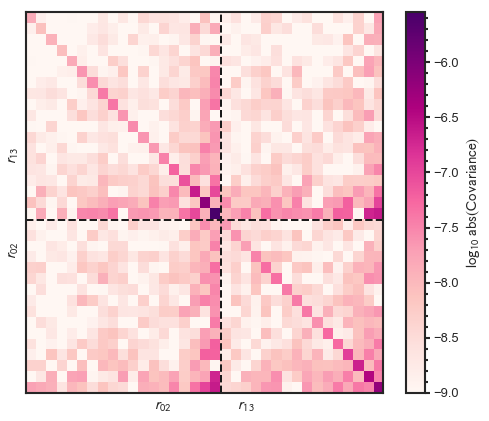

In [11]:
#plt.figure(figsize=(16,16))
fig, ax = plt.subplots(figsize=(8, 7))
cax = ax.matshow(np.log10(np.abs(Sigma)), cmap=matplotlib.cm.RdPu, vmin=-9, aspect='auto')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
plt.ylabel(r'$r_{02}\quad\quad\quad\quad\quad\quad\quad r_{13}$')
plt.xlabel(r'$r_{02}\quad\quad\quad\quad\quad\quad      r_{13}$', labelpad=7)
fig.colorbar(cax, label=r'$\log_{10}~\rm{abs}(\rm{Covariance})$');

In [12]:
SSM_r02_spl = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')#(obs_r02s['freqs'])
SSM_r13_spl = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')#(obs_r13s['freqs'])
rs_rd = []
for ii in range(perturb.shape[0]):
    SSM_r02 = SSM_r02_spl(perturb[ii])
    SSM_r13 = SSM_r13_spl(perturb_r13[ii])
    rs_rd += [np.hstack(( (perturb[ii]     - SSM_r02)/SSM_r02,
                          (perturb_r13[ii] - SSM_r13)/SSM_r13
                        ))]

rs_rd = np.array(rs_rd)

In [13]:
Sigma = np.cov(rs_rd.T)
Sigma_inv = np.linalg.inv(Sigma)

In [14]:
np.linalg.norm(Sigma, ord=None) * np.linalg.norm(np.linalg.inv(Sigma), ord=None)

1373.2720027281161

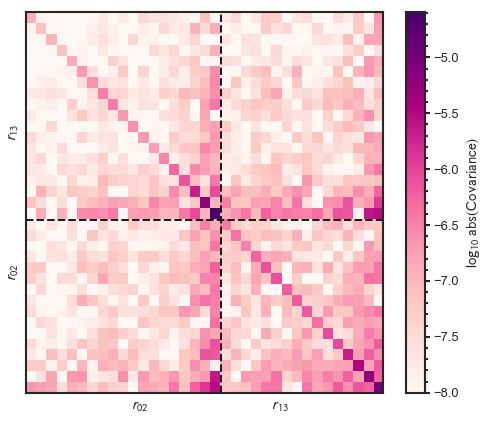

In [15]:
logSigma = np.log10(np.abs(Sigma))

fig, ax = plt.subplots(figsize=(8, 7))
cax = ax.matshow(logSigma, cmap=matplotlib.cm.RdPu, aspect='auto', vmin=-8, vmax=np.max(logSigma))
#cax = ax.matshow(Sigma, cmap=matplotlib.cm.RdPu, aspect='auto', vmin=1e-10, vmax=1e-5)#np.max(Sigma))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
plt.ylabel(r'$r_{02}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad r_{13}$')
plt.xlabel(r'$\quad r_{02}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad r_{13}\quad$', labelpad=7)
fig.colorbar(cax, label=r'$\log_{10}~\rm{abs}(\rm{Covariance})$');
#plt.savefig('ratios_cov.pdf');

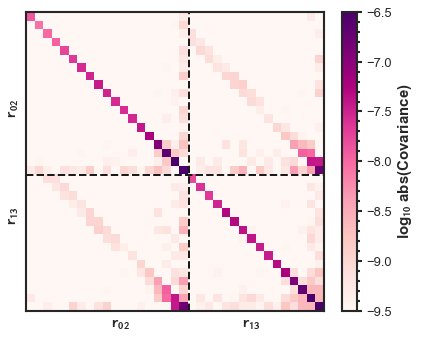

In [16]:
Sigma = np.load('mcmc/MCMC_save/Sigma.npy')
Sigma = Sigma[7:,7:]
logSigma = np.log10(np.abs(Sigma))
Sigma_inv = np.linalg.inv(Sigma)

fig, ax = plt.subplots(figsize=(6.666, 5.5))
cax = ax.matshow(logSigma, cmap=matplotlib.cm.RdPu, aspect='auto', vmin=-9.5, vmax=-6.5)# np.max(logSigma))
#cax = ax.matshow(Sigma, cmap=matplotlib.cm.RdPu, aspect='auto', vmin=1e-10, vmax=1e-5)#np.max(Sigma))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
plt.ylabel(r'$\mathbf{r_{13}\quad\quad\quad\quad\quad\quad\quad\quad r_{02}\quad}$')
plt.xlabel(r'$\mathbf{\quad\quad r_{02}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad r_{13}}$', labelpad=7)
#fig.colorbar(cax, label=r'$\mathbf{\log_{10}~\rm{abs}(\rm{Covariance})}$');
fig.colorbar(cax, label=r'log$_{\mathbf{10}}$ abs(Covariance)');
plt.savefig('ratios_cov.pdf');

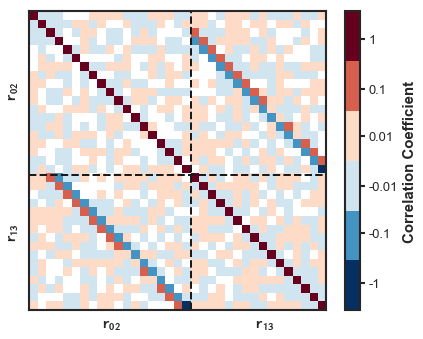

In [17]:
v = np.sqrt(np.diag(Sigma))
outer_v = np.outer(v, v)
correlation = Sigma / outer_v
correlation[Sigma == 0] = 0

masked_array = np.ma.masked_where(np.abs(correlation) < 1e-3, correlation)
cmap = matplotlib.cm.RdBu_r.copy()
cmap.set_bad(color='white')

ticks = [-1, -1e-1, -1e-2, 0, 1e-2, 1e-1, 1]

fig, ax = plt.subplots(figsize=(6.666, 5.5))
cax = ax.matshow(masked_array, 
                 norm=matplotlib.colors.BoundaryNorm(boundaries=ticks, ncolors=256),
                 cmap=cmap, aspect='auto') 
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.axhline(perturb.shape[1]-0.4, c='k', ls='--')
plt.axvline(perturb.shape[1]-0.4, c='k', ls='--')
plt.ylabel(r'$\mathbf{r_{13}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad r_{02}\quad}$')
plt.xlabel(r'$\mathbf{\quad\quad r_{02}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad r_{13}}$', labelpad=7)

plt.gca().yaxis.set_label_coords(-0.025, 0.5)
plt.gca().xaxis.set_label_coords(.5, -0.025)
cbar = fig.colorbar(cax, label=r'Correlation Coefficient',
             #spacing='proportional', 
             ticks=[-0.5, -5e-2, -5e-3, 5e-3, 5e-2, 5e-1]);
cbar.ax.set_yticklabels([-1, -1e-1, -1e-2, 1e-2, 1e-1, 1], minor=False)
cbar.ax.minorticks_off();

plt.savefig('ratios_corr.pdf');

In [18]:
np.log10(Sigma[0,0])

-7.887283764754461

In [19]:
all_ratios_obs = np.hstack((obs_r02s['ratios'], obs_r13s['ratios']))
all_ratios_obs

array([0.08938871, 0.08917325, 0.08833544, 0.08756867, 0.08565197,
       0.08394673, 0.08204336, 0.07908564, 0.07716726, 0.07452398,
       0.07197911, 0.06986654, 0.0672388 , 0.06516345, 0.06249169,
       0.06076957, 0.05826354, 0.05617459, 0.05330286, 0.1489244 ,
       0.14633389, 0.14364755, 0.14047075, 0.13784794, 0.13458078,
       0.1310305 , 0.12789089, 0.12479241, 0.12162664, 0.11765186,
       0.11457206, 0.11171312, 0.10831414, 0.10599747, 0.10667322])

In [20]:
SSM_r02 = SSM_r02_spl(obs_r02s['freqs'])
SSM_r13 = SSM_r13_spl(obs_r13s['freqs'])
rel_ratios_obs = np.hstack(( (obs_r02s['ratios'] - SSM_r02)/SSM_r02,
                             (obs_r13s['ratios'] - SSM_r13)/SSM_r13 ))
rel_ratios_obs

array([-0.0171939 , -0.01298247, -0.01456282, -0.01282492, -0.01075833,
       -0.01056706, -0.00497884, -0.00858344, -0.00412279, -0.00361691,
       -0.0041403 , -0.00020128, -0.001424  ,  0.00091677, -0.00610615,
        0.00073679, -0.00874108, -0.01134981, -0.031452  , -0.00783712,
       -0.01095974, -0.00868824, -0.00844233, -0.00872666, -0.00514521,
       -0.00741232, -0.00780912, -0.00332037, -0.0029468 , -0.00725096,
       -0.00379376, -0.00110973, -0.00138595,  0.00642672,  0.04315484])

# Plot the effects of changing rates on the SSM 

In [21]:
freqs = np.linspace(np.min(r02s['freqs']), np.max(r02s['freqs']), 1000)
freqs = np.linspace(1300, 3950, 1000)

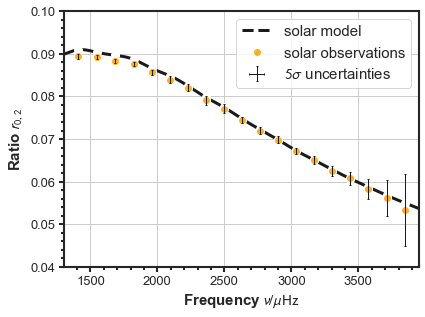

In [22]:
plt.plot(freqs, interp1d(r02s['freqs'], r02s['ratios'], kind=3)(freqs), '-', c='k', lw=3)
plt.plot(-1, -1, 'k--', label='solar model', lw=3)
#plt.plot(r02s['freqs'], r02s['ratios'], 'w.', ms=14)
plt.plot(obs_r02s['freqs'], 
         interp1d(r02s['freqs'], r02s['ratios'], kind=3)(obs_r02s['freqs']), 
         'w.', ms=16)

plt.plot(obs_r02s['freqs'], obs_r02s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white', label='solar observations')
plt.errorbar(obs_r02s['freqs'], obs_r02s['ratios'], yerr=std_r02s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend()

plt.ylim([0.04, 0.1])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $r_{0,2}$')
#plt.show()
plt.grid()
plt.tight_layout()
plt.subplots_adjust(left=0.2);
#plt.savefig('ratios_absolute.pdf')

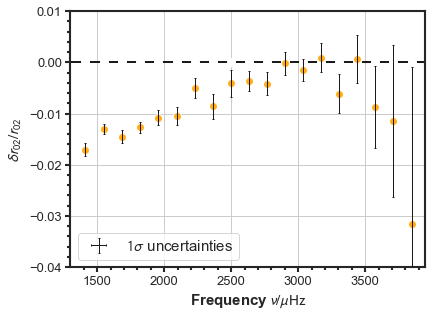

In [23]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=16)
plt.plot(-1, -1, 'k--', lw=3)#, label='solar model')

#interp = interp1d(modelS_r02s['freqs'], modelS_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
#plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c='#0571b0', zorder=0, label='Model S')

SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=16, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
         markeredgecolor='white')#, label='solar observations')
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1, label=r'$1\sigma$ uncertainties')

plt.legend(loc='lower left')

plt.ylim([-0.04, 0.01])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{02} / r_{02}$')
#plt.show()
plt.tight_layout()
plt.subplots_adjust(left=0.2)
plt.grid();
#plt.savefig('ratios_reldiff.pdf')

In [24]:
obs_r02s['ratios'][0]

0.08938871276343113

In [25]:
std_r02s[0]

0.00011751696433670969

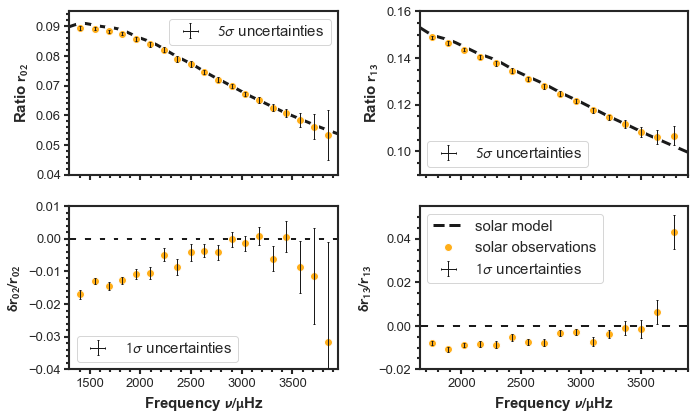

In [26]:
fig = plt.figure(figsize=(10,10/1.619))

ax1 = plt.subplot(2,2,1)
ax1.xaxis.set_ticklabels([])
plt.plot(freqs, interp1d(r02s['freqs'], r02s['ratios'], kind=3)(freqs), '-', c='k', lw=3)
plt.plot(-1, -1, 'k--', lw=3)
#plt.plot(r02s['freqs'], r02s['ratios'], 'w.', ms=14)
plt.plot(obs_r02s['freqs'], 
         interp1d(r02s['freqs'], r02s['ratios'], kind=3)(obs_r02s['freqs']), 
         'w.', ms=16)

plt.plot(obs_r02s['freqs'], obs_r02s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white')
plt.errorbar(obs_r02s['freqs'], obs_r02s['ratios'], yerr=std_r02s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend()

plt.ylim([0.04, 0.095])
plt.xlim([1300, 3950])
#plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $\mathbf{r_{02}}$')
#plt.show()
#plt.grid()


plt.subplot(2,2,3)#, sharex=ax1)

SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=16)
plt.plot(-1, -1, 'k--', lw=3)#, label='solar model')

#interp = interp1d(modelS_r02s['freqs'], modelS_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
#plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c='#0571b0', zorder=0, label='Model S')

SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=16, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
         markeredgecolor='white')#, label='solar observations')
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1, label=r'$1\sigma$ uncertainties')

plt.legend(loc='lower left')

plt.ylim([-0.04, 0.01])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\mathbf{\nu/\mu}$Hz')
plt.ylabel(r'$\mathbf{\delta r_{02} / r_{02}}$')
#plt.grid()



ax2 = plt.subplot(2,2,2)
ax2.xaxis.set_ticklabels([])
plt.plot(freqs, interp1d(r13s['freqs'], r13s['ratios'], kind=3)(freqs), '-', c='k', lw=3)
plt.plot(-1, -1, 'k--', lw=3)#, label='solar model')
#plt.plot(r02s['freqs'], r02s['ratios'], 'w.', ms=14)
plt.plot(obs_r13s['freqs'], 
         interp1d(r13s['freqs'], r13s['ratios'], kind=3)(obs_r13s['freqs']), 
         'w.', ms=16)

plt.plot(obs_r13s['freqs'], obs_r13s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white')#, label='solar observations')
plt.errorbar(obs_r13s['freqs'], obs_r13s['ratios'], yerr=std_r13s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend(loc='lower left')

plt.ylim([0.09, 0.16])
plt.xlim([1650, 3900])
#plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $\mathbf{r_{13}}$')
#plt.grid()


plt.subplot(2,2,4)#, sharex=ax2)
SSM = interp1d(r13s['freqs'], r13s['ratios'], kind=3, fill_value='extrapolate')(freqs)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(obs_r13s['freqs'], np.repeat(0, len(obs_r13s['freqs'])), 'w.', ms=16)
plt.plot(-1, -1, 'k--', lw=3, label='solar model')

SSM_ = interp1d(r13s['freqs'], r13s['ratios'], kind=1, fill_value='extrapolate')(obs_r13s['freqs'])
obs_ = unumpy.uarray(obs_r13s['ratios'], std_r13s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r13s['freqs'], [ob.n for ob in obs_], '.', ms=16, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
         markeredgecolor='white', label='solar observations')
plt.errorbar(obs_r13s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1, label=r'$1\sigma$ uncertainties')

plt.legend()

plt.ylim([-0.02, 0.055])
plt.xlim([1650, 3900])
plt.xlabel(r'Frequency $\mathbf{\nu/\mu}$Hz')
plt.ylabel(r'$\mathbf{\delta r_{13} / r_{13}}$')
#plt.grid()

#plt.subplots_adjust(wspace=0.05, hspace=0.01)
plt.tight_layout()

plt.savefig('ratios_all.pdf')

In [27]:
[o.n/o.s for o in obs_]

[-8.164826933047955,
 -10.192944902740818,
 -9.128146850034874,
 -6.591276677139121,
 -5.562302795736124,
 -3.2643450907757536,
 -5.024048843438976,
 -5.165542534171942,
 -2.095335910212232,
 -2.245211026643994,
 -3.739858866510877,
 -1.925079086080982,
 -0.352833561187617,
 -0.33846919725682767,
 1.1343270546171738,
 5.463933937371864]

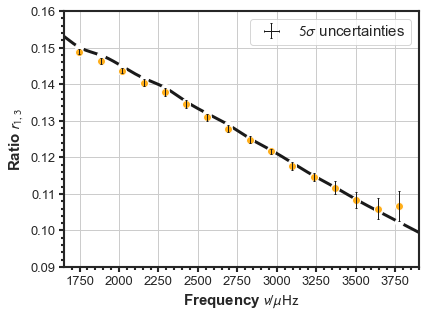

In [28]:
plt.plot(freqs, interp1d(r13s['freqs'], r13s['ratios'], kind=3)(freqs), '-', c='k', lw=3)
plt.plot(-1, -1, 'k--', lw=3)#, label='solar model')
#plt.plot(r02s['freqs'], r02s['ratios'], 'w.', ms=14)
plt.plot(obs_r13s['freqs'], 
         interp1d(r13s['freqs'], r13s['ratios'], kind=3)(obs_r13s['freqs']), 
         'w.', ms=16)

plt.plot(obs_r13s['freqs'], obs_r13s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white')#, label='solar observations')
plt.errorbar(obs_r13s['freqs'], obs_r13s['ratios'], yerr=std_r13s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend()

plt.ylim([0.09, 0.16])
plt.xlim([1650, 3900])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $r_{1,3}$')
#plt.show()
plt.grid()
plt.tight_layout()
plt.subplots_adjust(left=0.2)
plt.savefig('ratios_absolute_r13.pdf')

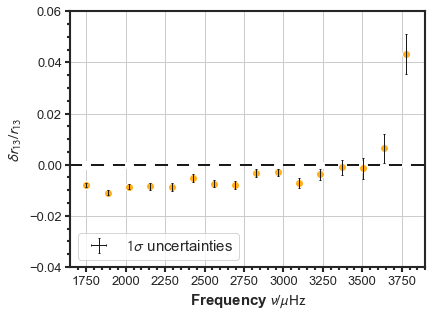

In [29]:
SSM = interp1d(r13s['freqs'], r13s['ratios'], kind=3, fill_value='extrapolate')(freqs)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(obs_r13s['freqs'], np.repeat(0, len(obs_r13s['freqs'])), 'w.', ms=16)
plt.plot(-1, -1, 'k--', lw=3)#, label='solar model')

SSM_ = interp1d(r13s['freqs'], r13s['ratios'], kind=1, fill_value='extrapolate')(obs_r13s['freqs'])
obs_ = unumpy.uarray(obs_r13s['ratios'], std_r13s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r13s['freqs'], [ob.n for ob in obs_], '.', ms=16, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
         markeredgecolor='white')#, label='solar observations')
plt.errorbar(obs_r13s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1, label=r'$1\sigma$ uncertainties')

plt.legend(loc='lower left')

plt.ylim([-0.04, 0.06])
plt.xlim([1650, 3900])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{13} / r_{13}$')
#plt.show()
plt.tight_layout()
plt.subplots_adjust(left=0.2)
plt.grid()
plt.savefig('ratios_reldiff_r13.pdf')

In [30]:
[o.n/o.s for o in obs_]

[-8.164826933047955,
 -10.192944902740818,
 -9.128146850034874,
 -6.591276677139121,
 -5.562302795736124,
 -3.2643450907757536,
 -5.024048843438976,
 -5.165542534171942,
 -2.095335910212232,
 -2.245211026643994,
 -3.739858866510877,
 -1.925079086080982,
 -0.352833561187617,
 -0.33846919725682767,
 1.1343270546171738,
 5.463933937371864]

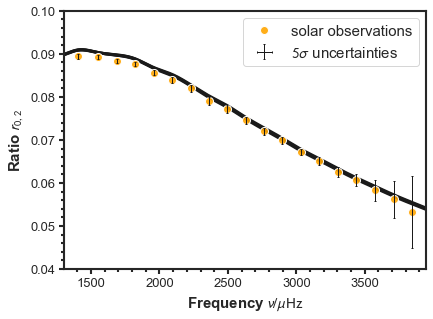

In [31]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)

for ii in range(-5, 1, 1):
    if ii % 2 == 0:
        continue
    rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r02s = r02(rate_DF)
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=3, fill_value='extrapolate')(freqs)
    plt.plot(freqs, interp, '-', c='k', lw=3)

plt.plot(obs_r02s['freqs'], obs_r02s['ratios'], '.', ms=16, 
              markerfacecolor=matplotlib.colors.to_rgba('orange', 0.9),
              markeredgecolor='white', label='solar observations')
plt.errorbar(obs_r02s['freqs'], obs_r02s['ratios'], yerr=std_r02s*5, xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=99, capsize=1,
            label=r'$5\sigma$ uncertainties')

plt.legend()

plt.ylim([0.04, 0.1])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'Ratio $r_{0,2}$')
plt.show()

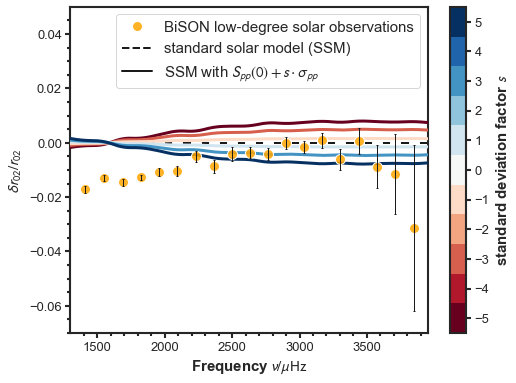

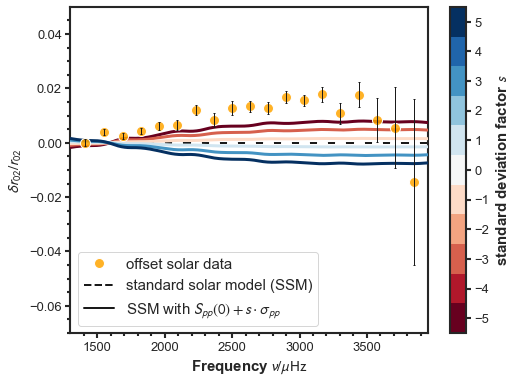

In [32]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

for offset in [0, 0.017]:

    fig, ax = plt.subplots(figsize=(8,6))

    ### plot models at different sigmas 
    sigmas = range(-5, 6, 1)#range(-5, 6, 1)
    for ii in sigmas:
        if ii % 2 == 0: 
            continue 
        rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
            names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
        rate_r02s = r02(rate_DF)
        interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
        plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
        #plt.plot(rate_r02s['freqs'], rate_r02s['ratios'], 'k.')

    ### plot solar data 
    SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
    obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
    #obs_ = (obs_-SSM_)/SSM_ #+ 0.017
    obs_ = (obs_-SSM_)/SSM_ + offset
    lab = 'BiSON low-degree solar observations'
    if offset > 0:
        lab = 'offset solar data'
    plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
             markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
             markeredgecolor='white', label=lab, zorder=100)
    plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                 fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

    ### SSM at y=0
    #plt.axhline(0, ls='--', c='k', zorder=99)
    plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
    plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
    plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=20, zorder=2)

    plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

    cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
    cbar.ax.minorticks_off()
    plt.legend()

    #plt.axvline(3090, ls='--', c='k')
    #ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

    #ax.set_rasterization_zorder(9999)
    plt.ylim([-0.07, 0.05])
    plt.xlim([1300, 3950])
    plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
    plt.ylabel(r'$\delta r_{02} / r_{02}$')
    #plt.show()
    
    filename = 'S02_r02'
    if offset: 
        filename += '_offset'
    #plt.savefig(filename + '.png', bbox_inches='tight', dpi=400)
    plt.show()

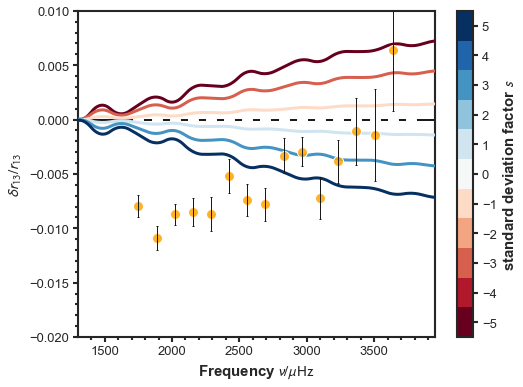

In [33]:
SSM = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(figsize=(8,6))

### plot models at different sigmas 
sigmas = range(-5, 6, 1)#range(-5, 6, 1)
for ii in sigmas:
    if ii % 2 == 0: 
        continue 
    rate_DF = pd.read_table('r1/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r13s = r13(rate_DF)
    interp = interp1d(rate_r13s['freqs'], rate_r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
    #plt.plot(rate_r13s['freqs'], rate_r13s['ratios'], 'k.')

### plot solar data 
SSM_ = interp1d(r13s['freqs'], r13s['ratios'], kind=1, fill_value='extrapolate')(obs_r13s['freqs'])
obs_ = unumpy.uarray(obs_r13s['ratios'], std_r13s)
#obs_ = (obs_-SSM_)/SSM_ #+ 0.017
obs_ = (obs_-SSM_)/SSM_ #+ 0.017
plt.plot(obs_r13s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
         markeredgecolor='white', label='BiSON low-degree solar observations', zorder=100)
plt.errorbar(obs_r13s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

### SSM at y=0
#plt.axhline(0, ls='--', c='k', zorder=99)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
plt.plot(obs_r13s['freqs'], np.repeat(0, len(obs_r13s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
cbar.ax.minorticks_off()
#plt.legend()

#plt.axvline(3090, ls='--', c='k')
#ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

plt.ylim([-0.02, 0.01])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{13} / r_{13}$')
plt.savefig('S0_r13.png', bbox_inches='tight', dpi=400)
plt.show()

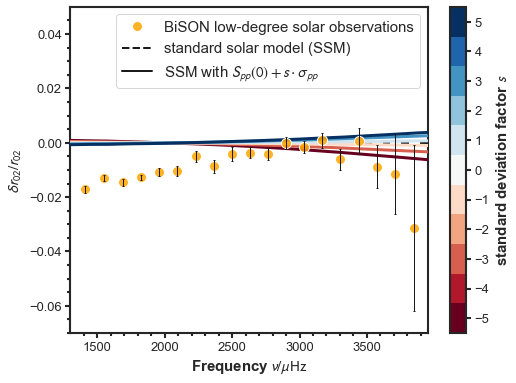

In [34]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)


fig, ax = plt.subplots(figsize=(8,6))

### plot models at different sigmas 
sigmas = range(-5, 6, 1)#range(-5, 6, 1)
for ii in sigmas:
    if ii % 2 == 0: 
        continue 
    rate_DF = pd.read_table('r2/' + str(ii) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_r02s = r02(rate_DF)
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
    #plt.plot(rate_r02s['freqs'], rate_r02s['ratios'], 'k.')

### plot solar data 
SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
#obs_ = (obs_-SSM_)/SSM_ #+ 0.017
obs_ = (obs_-SSM_)/SSM_ 
lab = 'BiSON low-degree solar observations'
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=20, 
         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
         markeredgecolor='white', label=lab, zorder=100)
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=15, lw=0, elinewidth=1, zorder=101, capsize=1)

### SSM at y=0
#plt.axhline(0, ls='--', c='k', zorder=99)
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', label='standard solar model (SSM)', lw=2, zorder=1)
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-', label='SSM with $S_{pp}(0) + s\cdot\sigma_{pp}$')

cbar = plt.colorbar(cmap, values=sigmas, ticks=sigmas, label=r'standard deviation factor $s$')
cbar.ax.minorticks_off()
plt.legend()

#plt.axvline(3090, ls='--', c='k')
#ax.add_patch(matplotlib.patches.Rectangle((3090-135.1*5, -0.07), 135.1*10, 1, color='r'))

#ax.set_rasterization_zorder(9999)
plt.ylim([-0.07, 0.05])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{02} / r_{02}$')
#plt.show()

#filename = 'S02_r02'
#plt.savefig(filename + '.png', bbox_inches='tight', dpi=400)
plt.show()

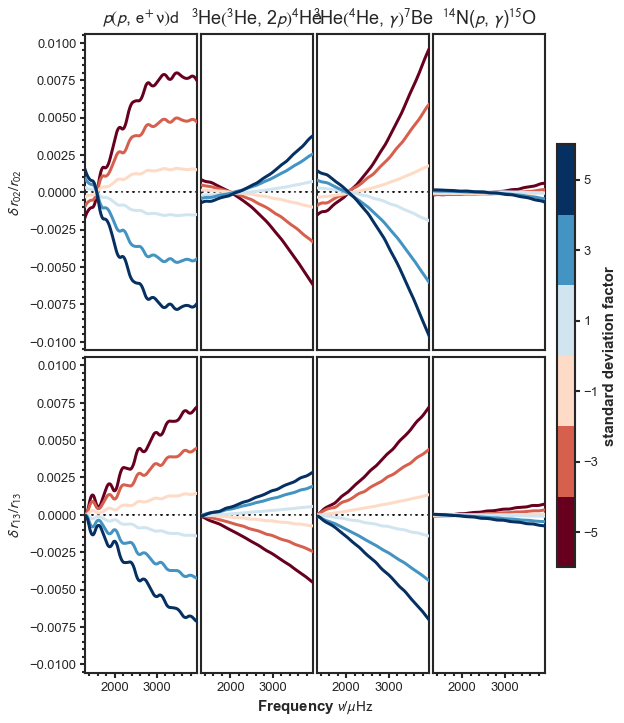

In [35]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(8.25, 11.75))
axes = ax.flatten()

#plt.ylim([-0.019, 0.019])
plt.xlim([1300, 3950])

counter = 0
for ratio in [(r'r_{02}', r02), (r'r_{13}', r13)]:
    ratios = ratio[1](DF)
    SSM = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    
    if ratio[1] == r02:
        obs_ratios = obs_r02s
        std = std_r02s
    elif ratio[1] == r13:
        obs_ratios = obs_r13s
        std = std_r13s
    
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        #ax = plt.subplot(3,3,counter, sharex=True, sharey=True)
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        if ratio[1] != r13:
            ax.xaxis.set_visible(False)
        
        if ratio[1] == r02:
            if rate == 'r1':
                ax.set_title(r'$p(p$, $\rm{e}^{+}\,\nu)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3$He$(^3$He, 2$p)^4$He')
            elif rate == 'r3':
                ax.set_title(r'$^3$He$(^4$He, $\gamma)^7$Be')
            elif rate == 'r5':
                ax.set_title(r'$^{14}$N($p$, $\gamma$)$^{15}$O')
        
        if rate == 'r1':
            ax.set_ylabel(r'$\delta\,'+ratio[0]+r'/'+ratio[0]+'$')
        
        # plot data
        """
        if rate == 'r2':
            SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
            obs_ = unumpy.uarray(obs_ratios['ratios'], std)
            obs_ = (obs_-SSM_)/SSM_ 
            ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=12, 
                     markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
                     markeredgecolor='white', label=lab, zorder=100)
            ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                         fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        """
        
        sigmas = range(-5, 6, 2)
        for ii in sigmas:
            rate_DF = pd.read_table(rate + '/' + str(ii) + '.freqs', sep='\s+', comment='#',
                names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
            rate_ratios = ratio[1](rate_DF)
            interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
            ax.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
        
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=6, zorder=2)

plt.subplots_adjust(wspace=0.03, hspace=0.02)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.25, 0.03, 0.5])
cbar = plt.colorbar(cmap, cax=cbar_ax, values=sigmas, ticks=sigmas, label=r'standard deviation factor')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')

#plt.tight_layout()
#plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

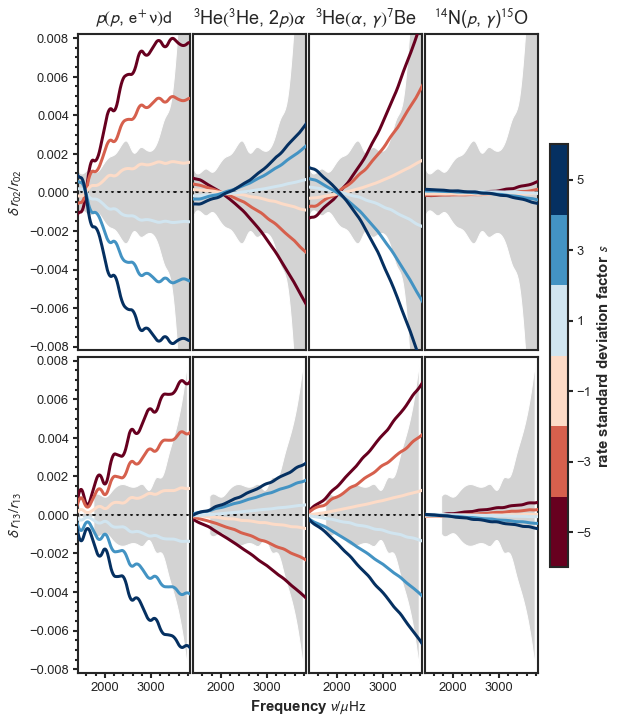

In [36]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(8.25, 11.75))
axes = ax.flatten()

plt.ylim([-0.0082, 0.0082])
plt.xlim([np.min(obs_r02s['freqs']), np.max(obs_r02s['freqs'])])

counter = 0
for ratio in [(r'r_{02}', r02), (r'r_{13}', r13)]:
    ratios = ratio[1](DF)
    SSM = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    
    if ratio[1] == r02:
        obs_ratios = obs_r02s
        std = std_r02s
    elif ratio[1] == r13:
        obs_ratios = obs_r13s
        std = std_r13s
    
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        #ax = plt.subplot(3,3,counter, sharex=True, sharey=True)
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        if ratio[1] != r13:
            ax.xaxis.set_visible(False)
        
        if ratio[1] == r02:
            if rate == 'r1':
                ax.set_title(r'$p(p$, $\rm{e}^{+}\,\nu)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3$He$(^3$He, 2$p)\alpha$')
            elif rate == 'r3':
                ax.set_title(r'$^3$He$(\alpha$, $\gamma)^7$Be')
            elif rate == 'r5':
                ax.set_title(r'$^{14}$N($p$, $\gamma$)$^{15}$O')
        
        if rate == 'r1':
            ax.set_ylabel(r'$\delta\,'+ratio[0]+r'/'+ratio[0]+'$')
        
        # plot data
        SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        obs_ = unumpy.uarray(obs_ratios['ratios'], std)
        obs_ = (obs_-SSM_)/SSM_ 
        unc = np.array([ob.std_dev for ob in obs_])
        #ax.fill_between(obs_ratios['freqs'], -unc, unc, zorder=-1, facecolor='gray')
        freqs_ = np.linspace(np.min(obs_ratios['freqs']), np.max(obs_ratios['freqs']), 100)
        interp = interp1d(obs_ratios['freqs'], unc, kind=3, fill_value='extrapolate')(freqs_)
        ax.fill_between(freqs_, -interp, interp, zorder=-1, facecolor='lightgray')
        #ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=12, 
        #         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
        #         markeredgecolor='white', label=lab, zorder=100)
        #ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
        #             fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        # plot rates 
        sigmas = range(-5, 6, 2)
        for ii in sigmas:
            rate_DF = pd.read_table(rate + '/' + str(ii) + '.freqs', sep='\s+', comment='#',
                names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
            rate_ratios = ratio[1](rate_DF)
            interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
            ax.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
        
        # line at zero 
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), '.', c='lightgray', ms=6, zorder=2)

plt.subplots_adjust(wspace=0.03, hspace=0.02)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.25, 0.03, 0.5])
cbar = plt.colorbar(cmap, cax=cbar_ax, values=sigmas, ticks=sigmas, label=r'rate standard deviation factor $s$')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')

#plt.tight_layout()
#plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

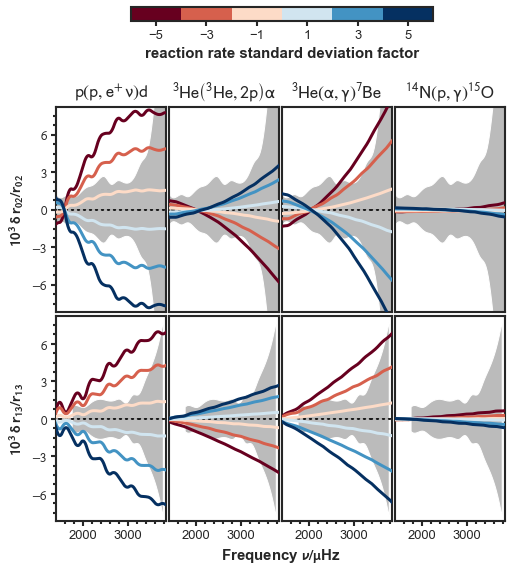

In [37]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 10))
axes = ax.flatten()

plt.ylim([-0.0082, 0.0082])
plt.xlim([np.min(obs_r02s['freqs']), np.max(obs_r02s['freqs'])])

counter = 0
for ratio in [(r'r_{02}', r02), (r'r_{13}', r13)]:
    ratios = ratio[1](DF)
    SSM = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    
    if ratio[1] == r02:
        obs_ratios = obs_r02s
        std = std_r02s
    elif ratio[1] == r13:
        obs_ratios = obs_r13s
        std = std_r13s
    
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        #ax = plt.subplot(3,3,counter, sharex=True, sharey=True)
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        if ratio[1] != r13:
            ax.xaxis.set_visible(False)
        
        if ratio[1] == r02:
            if rate == 'r1':
                ax.set_title(r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3\rm{He}\left(^3\rm{He}, 2\rm{p}\right)\alpha$')
            elif rate == 'r3':
                ax.set_title(r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$')
            elif rate == 'r5':
                ax.set_title(r'$^{14}\rm{N}\left(\rm{p}, \gamma\right)^{15}\rm{O}$')
        
        if rate == 'r1':
            ax.set_ylabel(r'$\mathbf{10^3\;\delta\,'+ratio[0]+r'/'+ratio[0]+'}$')
            #print(ax.get_yticklabels())
            #ax.set_yticklabels([-7.5, -5.0, -2.5, 0, 2.5, 5, 7.5])
            #ticks_loc = ax.get_yticks().tolist()
            ticks_loc = np.array([-6, -3, 0, 3, 6])*1e-3
            #ax.set_yticks(ax.get_yticks().tolist())
            ax.set_yticks(ticks_loc)
            ax.set_yticklabels(['${:1d}$'.format(int(x*10**3)) for x in ticks_loc])
        
        # plot data
        SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        obs_ = unumpy.uarray(obs_ratios['ratios'], std)
        obs_ = (obs_-SSM_)/SSM_ 
        unc = np.array([ob.std_dev for ob in obs_])
        #ax.fill_between(obs_ratios['freqs'], -unc, unc, zorder=-1, facecolor='gray')
        freqs_ = np.linspace(np.min(obs_ratios['freqs']), np.max(obs_ratios['freqs']), 100)
        interp = interp1d(obs_ratios['freqs'], unc, kind=3, fill_value='extrapolate')(freqs_)
        ax.fill_between(freqs_, -interp, interp, zorder=-1, facecolor='#bbbbbb')
        #ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=12, 
        #         markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
        #         markeredgecolor='white', label=lab, zorder=100)
        #ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
        #             fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        # plot rates 
        sigmas = range(-5, 6, 2)
        for ii in sigmas:
            rate_DF = pd.read_table(rate + '/' + str(ii) + '.freqs', sep='\s+', comment='#',
                names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
            rate_ratios = ratio[1](rate_DF)
            interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
            ax.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(ii), zorder=3)
        
        # line at zero 
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), '.', c='#bbbbbb', ms=5, zorder=2)
        
        #print(plt.gca().get_yticklabels())
        #plt.gca().set_yticklabels(plt.gca().get_yticklabels()*10**-3)
        #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        #plt.gca().ticklabel_format(useOffset=False)

plt.subplots_adjust(wspace=0.03, hspace=0.02, left=0.01)

"""
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.25, 0.03, 0.5])
cbar = plt.colorbar(cmap, cax=cbar_ax, values=sigmas, ticks=sigmas, label=r'rate standard deviation factor $s$')
cbar.ax.minorticks_off()
"""
fig.subplots_adjust(top=0.7)
cbar_ax = fig.add_axes([0.158, 0.82, 0.6, 0.02])
cbar = plt.colorbar(cmap, cax=cbar_ax, values=sigmas, ticks=sigmas, label=r'reaction rate standard deviation factor',
                   orientation='horizontal')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Frequency $\mathbf{\nu/\mu}$Hz')

plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

Structure of modified models
==

In [38]:
SSM = pd.read_table('std2/calibrate.FGONG.dat')
SSM

,x,m,c2,u,Y,r,q,T,P,rho,...,r_X,Z,R_min_r,eps_g,L_g,X_He3,X_C12,X_C13,X_N14,X_O16
0,1.000386e+00,1.989000e+33,5.346380e+11,3.236774e+11,0.273846,6.962586e+10,8.660742e-11,4.876258e+03,9.951670e+03,3.074565e-08,...,0.000000e+00,0.017148,-2.684192e+07,0.0,0.0,0.000000,0.0,0.0,0.004007,0.008838
1,1.000377e+00,1.989000e+33,5.347327e+11,3.238030e+11,0.273846,6.962523e+10,8.600600e-11,4.878252e+03,1.048989e+04,3.239591e-08,...,0.000000e+00,0.017148,-2.621952e+07,0.0,0.0,0.000000,0.0,0.0,0.004007,0.008838
2,1.000368e+00,1.989000e+33,5.348475e+11,3.239429e+11,0.273846,6.962461e+10,8.536792e-11,4.880462e+03,1.106093e+04,3.414470e-08,...,0.000000e+00,0.017148,-2.559290e+07,0.0,0.0,0.000000,0.0,0.0,0.004007,0.008838
3,1.000359e+00,1.989000e+33,5.349806e+11,3.240987e+11,0.273846,6.962398e+10,8.469111e-11,4.882915e+03,1.166663e+04,3.599715e-08,...,0.000000e+00,0.017148,-2.496237e+07,0.0,0.0,0.000000,0.0,0.0,0.004007,0.008838
4,1.000350e+00,1.989000e+33,5.351345e+11,3.242722e+11,0.273846,6.962334e+10,8.397340e-11,4.885634e+03,1.230893e+04,3.795863e-08,...,0.000000e+00,0.017148,-2.432822e+07,0.0,0.0,0.000000,0.0,0.0,0.004007,0.008838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,1.262690e-03,9.107170e+17,2.562193e+15,1.538491e+15,0.666560,8.788196e+07,-1.533925e+01,1.555773e+07,2.345138e+17,1.524311e+02,...,-2.645187e-18,0.017148,6.951113e+10,0.0,0.0,0.000008,0.0,0.0,0.004497,0.008279
2438,1.244368e-03,8.232608e+17,2.562192e+15,1.538490e+15,0.666562,8.660682e+07,-1.538310e+01,1.555774e+07,2.345146e+17,1.524316e+02,...,-2.645195e-18,0.017148,6.951241e+10,0.0,0.0,0.000008,0.0,0.0,0.004497,0.008279
2439,1.226313e-03,7.442029e+17,2.562191e+15,1.538489e+15,0.666563,8.535017e+07,-1.542694e+01,1.555776e+07,2.345153e+17,1.524322e+02,...,-2.645202e-18,0.017148,6.951366e+10,0.0,0.0,0.000008,0.0,0.0,0.004497,0.008279
2440,1.208519e-03,6.727367e+17,2.562192e+15,1.538490e+15,0.666564,8.411176e+07,-1.547079e+01,1.555777e+07,2.345159e+17,1.524326e+02,...,-2.645216e-18,0.017148,6.951490e+10,0.0,0.0,0.000008,0.0,0.0,0.004497,0.008279


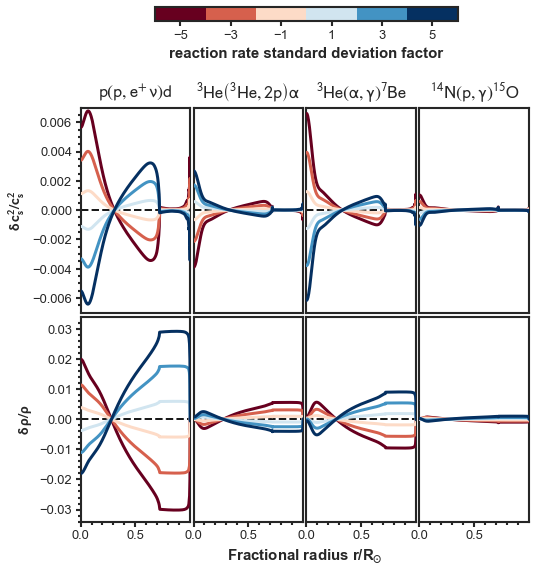

In [39]:
#fig, ax = plt.subplots(figsize=(13,8.6))

fig, ax = plt.subplots(2, 4, sharex=True, sharey=False, figsize=(7, 10))
axes = ax.flatten()

#plt.ylim([-0.02, 0.02])
#plt.xlim([-0.01, 1.01])
plt.xlim([0, 1])

#norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
#cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)
#rate = 'r1'

sigmas = range(-5, 6, 2)

counter = 0
for qty in ['c2', 'rho']:
    for rate in ['r1', 'r2', 'r3', 'r5']:
        ax = axes[counter]
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        
        if qty == 'c2':
            ax.xaxis.set_visible(False)
            if rate == 'r1':
                ax.set_title(r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3\rm{He}\left(^3\rm{He}, 2\rm{p}\right)\alpha$')
            elif rate == 'r3':
                ax.set_title(r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$')
            elif rate == 'r5':
                ax.set_title(r'$^{14}\rm{N}\left(\rm{p}, \gamma\right)^{15}\rm{O}$')
            ax.set_ylim([-0.007, 0.007])
        else:
            ax.set_ylim([-0.034, 0.034])
        
        #ticks_loc = ax.get_yticks().tolist()
        #ax.set_xticks([0.25, 0.75])
        #ax.set_xticks([0.25, 0.5, 0.75])
        ax.set_xticks([0, 0.5])
        #ax.set_yticklabels(['${:.1f}$'.format(x*10**3) for x in ticks_loc])
        
        if rate == 'r1':
            if qty == 'c2':
                ax.set_ylabel(r'$\mathbf{\delta\,c_s^2/c_s^2}$')
            else:
                ax.set_ylabel(r'$\mathbf{\delta\,\rho/\rho}$')
        
        for ii in sigmas:
            gong = pd.read_table(rate + '/' + str(ii) + '.FGONG.dat')
            c2 = interp1d(gong.x, gong[qty], kind=2, fill_value='extrapolate')(SSM.x)
            ax.plot(SSM.x, (c2-SSM[qty])/SSM[qty], lw=3, c=cmap.to_rgba(ii), zorder=3)
        
        #ax.grid()
        ax.axhline(0, c='k', ls='--')

plt.subplots_adjust(wspace=0.03, hspace=0.02, left=0.01, top=0.7)
cbar_ax = fig.add_axes([0.158, 0.82, 0.6, 0.02])
cbar = plt.colorbar(cmap, cax=cbar_ax, values=sigmas, ticks=sigmas, label=r'reaction rate standard deviation factor',
                   orientation='horizontal')
cbar.ax.minorticks_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Fractional radius r/R$_{\mathbf{\odot}}$')

plt.savefig('allrates-struc.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

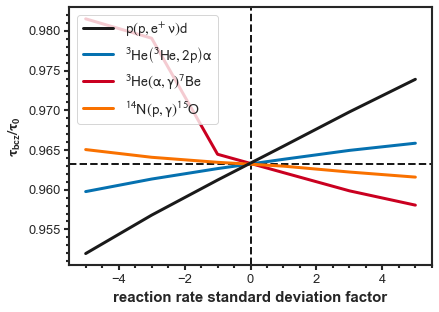

In [40]:
sigmas = range(-5, 6, 2)

red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

gong = SSM
y = 1/np.sqrt(gong.c2.values)
dz = 0.5*(y[1:]+y[:-1])*np.diff(gong.r[::-1])
ad = np.hstack((0., np.cumsum(dz)))
ad_SSM = ad[np.argmin(gong['x'][gong['conv_stab']<0])] / ad[-1]
adtot_SSM = ad[-1]

for rate in ['r1', 'r2', 'r3', 'r5']:
    zorder = 1
    if rate == 'r1':
        c = 'k'
        lab = r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$'
        zorder=10
    elif rate == 'r2':
        c = blue
        lab = r'$^3\rm{He}\left(^3\rm{He}, 2\rm{p}\right)\alpha$'
    elif rate == 'r3':
        c = red
        lab = r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$'
    else:
        c = orange
        lab = r'$^{14}\rm{N}\left(\rm{p}, \gamma\right)^{15}\rm{O}$'
    bczs = []
    ads  = []
    for ii in sigmas:
        gong = pd.read_table(rate + '/' + str(ii) + '.FGONG.dat')
        y = 1/np.sqrt(gong.c2.values)
        dz = 0.5*(y[1:]+y[:-1])*np.diff(gong.r[::-1])
        ad = np.hstack((0., np.cumsum(dz)))
        ads += [ad[np.argmin(gong['x'][gong['conv_stab']<0])] / adtot_SSM] #ad[-1]]
        #bczs += [np.min(gong['x'][gong['conv_stab']<0])]
    #plt.plot(sigmas, bczs, label=rate)
    plt.plot(sigmas, ads, label=lab, c=c, lw=3, zorder=zorder)
plt.axhline(ad_SSM, ls='--', c='k', zorder=-100)
plt.axvline(0, ls='--', c='k', zorder=-100)
plt.xlabel('reaction rate standard deviation factor')
plt.ylabel(r'$\mathbf{\tau_{\rm{\mathbf{bcz}}} / \tau_0}$')
plt.legend(loc='upper left')
plt.show()

0.3088220462687073


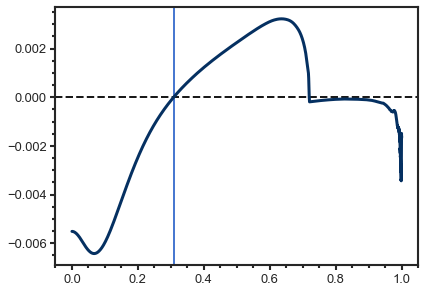

In [41]:
qty = 'c2'
gong = pd.read_table('r1/5.FGONG.dat')
c2 = interp1d(gong.x, gong[qty], kind=2, fill_value='extrapolate')(SSM.x)
plt.plot(SSM.x, (c2-SSM[qty])/SSM[qty], lw=3, c=cmap.to_rgba(ii), zorder=3)
print(SSM.x[np.argmin(np.abs((c2-SSM[qty])/SSM[qty]))])
plt.axvline(SSM.x[np.argmin(np.abs((c2-SSM[qty])/SSM[qty]))])
plt.axhline(0, ls='--', c='k')

In [42]:
def get_xya(filename):
    with open(filename) as f:
        s = f.readline()
        Z = s.split('.')[3][1:]
        Z = float('0.0' + Z)

        X = s.split('.')[4][1:]
        X = float('0.' + X)

        alpha = s.split('.')[5][1:]
        alpha = float(alpha[0] + '.' + alpha[1:])

        return Z, X, alpha

get_xya('r1/1.dat')

(0.0171398267, 0.713972192, 1.8841473756)

In [43]:
SSM_xya = get_xya('std2/calibrate.dat')
SSM_xya

(0.0171479742, 0.7141802922, 1.8798212323)

1sigma
Z -0.04751290096995686
5sigma
Z -0.2349863577471304
1sigma
X -0.029138328552726887
5sigma
X -0.14819473619746137
1sigma
alpha 0.23013588875718743
5sigma
alpha 1.1701270536819552


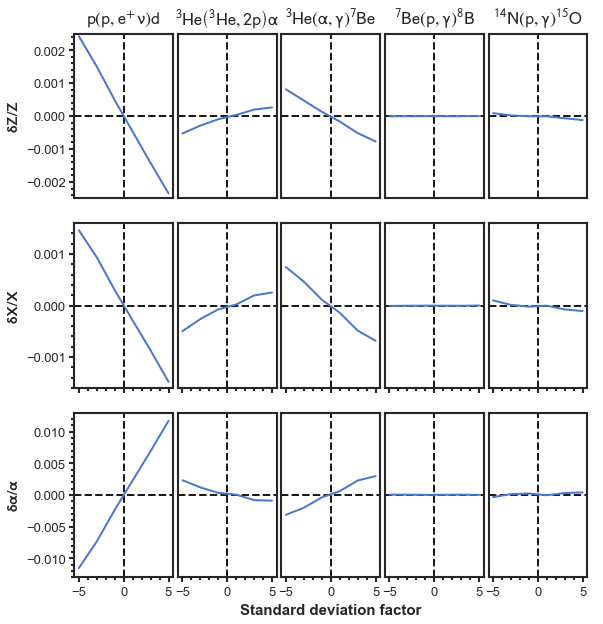

In [77]:
fig, ax = plt.subplots(3, 5, sharex=True, sharey=False, figsize=(8, 10))
axes = ax.flatten()

plt.xlim([-5.5, 5.5])

sigmas = range(-5, 6, 2)

counter = 0
for k in range(3):
    axmin = 0
    axmax = 0
    for rate in ['r1', 'r2', 'r3', 'r4', 'r5']:
        ax = axes[counter]
        counter += 1
        
        if rate != 'r1':
            ax.yaxis.set_visible(False)
        
        if k == 0:
            ax.xaxis.set_visible(False)
            
            if rate == 'r1':
                ax.set_title(r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$')
            elif rate == 'r2':
                ax.set_title(r'$^3\rm{He}\left(^3\rm{He}, 2\rm{p}\right)\alpha$')
            elif rate == 'r3':
                ax.set_title(r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$')
            elif rate == 'r4':
                ax.set_title(r'$^7\rm{Be}\left(\rm{p}, \gamma\right)^8\rm{B}$')
            elif rate == 'r5':
                ax.set_title(r'$^{14}\rm{N}\left(\rm{p}, \gamma\right)^{15}\rm{O}$')
        
        if rate == 'r1':
            if k == 0:
                ax.set_ylabel(r'$\mathbf{\delta Z/Z}$')
            if k == 1:
                ax.set_ylabel(r'$\mathbf{\delta X/X}$')
            if k == 2:
                ax.set_ylabel(r'$\mathbf{\delta\alpha/\alpha}$')
        
        deltas = []
        for ii in sigmas:
            SSM_ = SSM_xya[k]
            delta = (get_xya(rate + '/' + str(ii) + '.dat')[k] - SSM_)/SSM_
            deltas += [delta]
            if rate == 'r1' and ii == 1:
                print('1sigma')
                print(('Z', 'X', 'alpha')[k], delta * 100)
            if rate == 'r1' and ii == 5:
                print('5sigma')
                print(('Z', 'X', 'alpha')[k], delta * 100)
        ax.plot(sigmas, deltas, zorder=10)
        
        if k == 0:
            ax.set_ylim([-0.0025, 0.0025])
        if k == 1:
            ax.set_ylim([-0.0016, 0.0016])
        if k == 2:
            ax.set_ylim([-0.013, 0.013])
        
        #ax.grid()
        ax.axhline(0, c='k', ls='--')
        ax.axvline(0, c='k', ls='--')

plt.subplots_adjust(wspace=0.05, hspace=0.15, left=0.01)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Standard deviation factor')

#plt.savefig('allrates-struc.pdf', bbox_inches='tight')#, dpi=400)
plt.show()

# Interpolate rates 

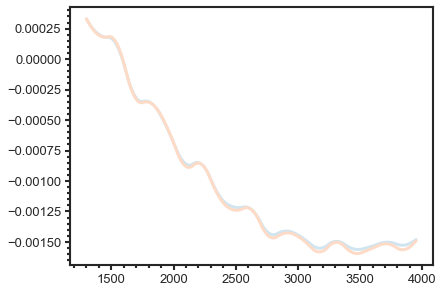

In [45]:
rate = 'r1'
ratio = r02

ratios = ratio(DF)
SSM = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)

#sigmas = range(-5, 6, 2)
#for ii in sigmas:
sigma = 1
rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
rate_ratios = ratio(rate_DF)
interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)

plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3)


sigma = -1
rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
rate_ratios = ratio(rate_DF)
interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)

plt.plot(freqs, -(interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3);

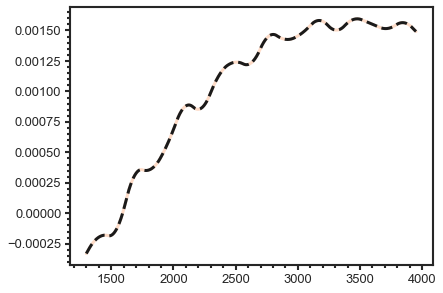

In [46]:
knots, coefs, spl_degree = sp.interpolate.splrep(freqs, (interp-SSM)/SSM)
plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3)
plt.plot(freqs, sp.interpolate.BSpline(knots, coefs, spl_degree)(freqs), '--', lw=3, c='k', zorder=4);

In [47]:
sigmas = range(-5, 6, 2)
spl_degree = 3
all_coefs = []
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    knots, coefs, _ = sp.interpolate.splrep(freqs, (interp-SSM)/SSM, k=spl_degree)
    all_coefs += [coefs]
    #print(coefs)
    #print(np.any(knots-knots2))
all_coefs = np.array(all_coefs)
all_coefs

array([[-0.00172816, -0.00171314, -0.00169091, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00095825, -0.00094897, -0.00093523, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00033056, -0.00032723, -0.00032227, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00032847,  0.00032537,  0.00032075, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00095718,  0.00094803,  0.00093447, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00157153,  0.00155589,  0.00153263, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
spls_single = []
for jj in range(len(knots)):
    spls_single += [interp1d(sigmas, all_coefs[:,jj], kind=2, fill_value='extrapolate')]

def rate_interp_single(sigma):
    coefs = np.array([spls_single[jj](sigma) for jj in range(len(knots))])
    return sp.interpolate.BSpline(knots, coefs, spl_degree)

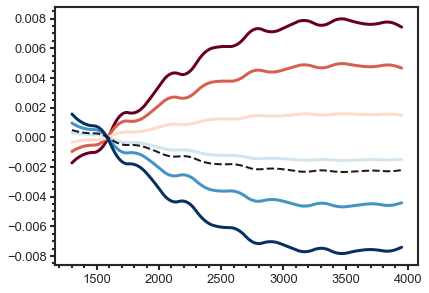

In [49]:
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    plt.plot(freqs, (interp-SSM)/SSM, '-', lw=3, c=cmap.to_rgba(sigma), zorder=3)

plt.plot(freqs, rate_interp_single(1.5)(freqs), 'k--', zorder=10);

In [50]:
SSM_ = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])

rel_diffs = []
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#', 
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(freqs)
    rel_diffs += [(interp-SSM)/SSM]
rel_diffs = np.array(rel_diffs)

In [51]:
rate = 'r1'
ratio = r02
ratios = ratio(DF)
SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])

interp_rel_diffs = []
for sigma in sigmas:
    rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#', 
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    rate_ratios = ratio(rate_DF)
    interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
    interp_rel_diffs += [(interp-SSM_)/SSM_]
interp_rel_diffs = np.array(interp_rel_diffs)

In [52]:
pt_spls_single = []
for jj in range(interp_rel_diffs.shape[1]):
    pt_spls_single += [interp1d(sigmas, interp_rel_diffs[:,jj], kind=2, fill_value='extrapolate')]

def rate_interp_point_single(sigma):
    return np.array([pt_spl(sigma) for pt_spl in pt_spls_single])

In [53]:
def plot_sigma_single(sigma):
    for jj in range(rel_diffs.shape[0]):
        plt.plot(freqs, rel_diffs[jj], '-', lw=3, c=cmap.to_rgba(sigmas[jj]), zorder=3)
    
    plt.plot(freqs, rate_interp_single(sigma)(freqs), 'k--', zorder=10)
    plt.plot(obs_ratios['freqs'], rate_interp_point_single(sigma), 'k.', ms=15, zorder=11)
    plt.xlabel(r'Frequency $\nu/\mu$Hz')
    plt.ylabel(r'Ratio $r_{0,2}$')
    plt.show()

#plot_sigma(3)
interact(plot_sigma_single, 
         sigma=FloatSlider(min=-6, max=6, step=0.01, value=3, continuous_update=True));

interactive(children=(FloatSlider(value=3.0, description='sigma', max=6.0, min=-6.0, step=0.01), Output()), _d…

In [54]:
def rate_interp_points(rate, ratio_name, sigma): 
    return np.array([pt_spl(sigma) for pt_spl in rate_pt_spls[(rate, ratio_name)]])

def rate_interp(rate, ratio_name, sigma): 
    spls = rate_spls[(rate, ratio_name)]
    coefs = np.array([spls[jj](sigma) for jj in range(len(knots))])
    return sp.interpolate.BSpline(knots, coefs, spl_degree)

freqs_ = np.linspace(freqs[0], freqs[-1], 50)
sigmas_ = [-5, -3, -1, 0, 1, 3, 5]

rate_pt_spls = {}
rate_spls = {}
for rate in ['r1', 'r2', 'r3', 'r5']:
    for ratio_name in ['r02', 'r13']:
        
        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
        
        SSM  = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(freqs_)
        SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        
        interp_rel_diffs = []
        all_coefs = []
        for sigma in sigmas_:
            if sigma == 0:
                rate_DF = SSM
                rate_ratios = ratios
            else:
                rate_DF = pd.read_table(rate + '/' + str(sigma) + '.freqs', sep='\s+', comment='#', 
                    names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
                rate_ratios = ratio(rate_DF)
            
            interp = interp1d(rate_ratios['freqs'], rate_ratios['ratios'], kind=2, fill_value='extrapolate')
            interp_rel_diffs += [(interp(obs_ratios['freqs'])-SSM_)/SSM_]
            knots, coefs, _ = sp.interpolate.splrep(freqs_, (interp(freqs_)-SSM)/SSM, k=spl_degree)
            all_coefs += [coefs]
        interp_rel_diffs = np.array(interp_rel_diffs)
        all_coefs = np.array(all_coefs)
        
        pt_spls = []
        for jj in range(interp_rel_diffs.shape[1]):
            pt_spls += [interp1d(sigmas_, interp_rel_diffs[:,jj], kind=2, fill_value='extrapolate')]
        rate_pt_spls[(rate, ratio_name)] = pt_spls
        #rate_interp_points[(rate, ratio_name)] = lambda sigma: np.array([pt_spl(sigma) for pt_spl in pt_spls])
        #print(len(rate_interp_points[(rate, ratio_name)](0)))
        
        # interpolate between the coefficients of the Bsplines 
        spls = []
        for jj in range(len(knots)):
            spls += [interp1d(sigmas_, all_coefs[:,jj], kind=2, fill_value='extrapolate')]
        rate_spls[(rate, ratio_name)] = spls
        #rate_interp[(rate, ratio_name)] = lambda sigma: \
        #    sp.interpolate.BSpline(knots, np.array([spls[jj](sigma) for jj in range(len(knots))]), spl_degree)

In [55]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

SSM_r02 = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs_)
SSM_r13 = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs_)

SSM_r02_ = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(obs_r02s['freqs'])
SSM_r13_ = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(obs_r13s['freqs'])

def plot_sigmas(sigma1, sigma2, sigma3, sigma5, offset1, offset2):
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8.25, 8.25))
    #axes = ax.flatten()

    plt.ylim([-0.075, 0.075])
    plt.xlim([1300, 3950])
    
    all_ratios = []
    
    counter = 0
    for ratio_name in ['r13']:

        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            offset = offset1
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            offset = offset2
        
        #ax = axes[counter]
        #counter += 1
        ax.set_ylabel(r'$\delta\,'+latex+r'/'+latex+'$')
        
        # plot interpolated rates 
        lines = np.zeros(len(freqs_)) + offset
        points = np.zeros(len(obs_ratios['freqs'])) + offset
        for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
            lines += rate_interp(rate, ratio_name, sigma)(freqs_)
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
        ax.plot(freqs_, lines, 'r-', lw=3, zorder=3)
        ax.plot(obs_ratios['freqs'], points, 'k.', ms=10, zorder=4)
        
        # plot data
        obs_ = unumpy.uarray(obs_ratios['ratios'], std)
        obs_ = (obs_-SSM_)/SSM_ 
        ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=25, 
                 markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
                 markeredgecolor='white', label=lab, zorder=100)
        ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                     fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_ratios['freqs'], np.repeat(0, len(obs_ratios['freqs'])), 'w.', ms=25, zorder=2)
    
    resid = rel_ratios_obs[len(std_r02s):] - np.array(all_ratios)
    chi2 = np.dot(resid, np.dot(Sigma_inv[len(std_r02s):, len(std_r02s):], resid))
    ax.set_title(r'$\chi^2 = ' + str(chi2/(len(rel_ratios_obs)-7)) + r'$')
    plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
    
    plt.subplots_adjust(wspace=0.03, hspace=0.02)

    #plt.tight_layout()
    #plt.savefig('allrates.pdf', bbox_inches='tight')#, dpi=400)
    plt.show()

interact(plot_sigmas, 
         sigma1=FloatSlider(min=-8, max=8, step=0.05, value=5.7352, continuous_update=True),
         sigma2=FloatSlider(min=-8, max=8, step=0.05, value=0.1737, continuous_update=True),
         sigma3=FloatSlider(min=-8, max=8, step=0.05, value=-0.6518, continuous_update=True),
         sigma5=FloatSlider(min=-8, max=8, step=0.05, value=2.9367, continuous_update=True),
         offset1=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.0061, continuous_update=True),
         offset2=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.0184, continuous_update=True));

interactive(children=(FloatSlider(value=5.7352, description='sigma1', max=8.0, min=-8.0, step=0.05), FloatSlid…

In [56]:
norm = matplotlib.colors.Normalize(vmin=-5, vmax=5)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.RdBu)

SSM_r02 = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs_)
SSM_r13 = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs_)

SSM_r02_ = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(obs_r02s['freqs'])
SSM_r13_ = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(obs_r13s['freqs'])

def plot_sigmas(sigma1, sigma2, sigma3, sigma5, offset1, offset2):
    fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8.25, 8.25))
    axes = ax.flatten()

    plt.ylim([-0.069, 0.069])
    plt.xlim([1300, 3950])
    
    all_ratios = []
    
    counter = 0
    for ratio_name in ['r02', 'r13']:

        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            offset = offset1
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            offset = offset2
        
        ax = axes[counter]
        counter += 1
        ax.set_ylabel(r'$\delta\,'+latex+r'/'+latex+'$')
        
        # plot interpolated rates 
        lines = np.zeros(len(freqs_)) + offset
        points = np.zeros(len(obs_ratios['freqs'])) + offset
        for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
            lines += rate_interp(rate, ratio_name, sigma)(freqs_)
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
        ax.plot(freqs_, lines, 'r-', lw=3, zorder=3)
        ax.plot(obs_ratios['freqs'], points, 'k.', ms=10, zorder=4)
        
        # plot data
        obs_ = unumpy.uarray(obs_ratios['ratios'], std)
        obs_ = (obs_-SSM_)/SSM_ 
        ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=25, 
                 markerfacecolor=matplotlib.colors.to_rgba('orange', 0.85),
                 markeredgecolor='white', label=lab, zorder=100)
        ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                     fmt='', c='k', ms=4, lw=0, elinewidth=1, zorder=101, capsize=1)
        
        ax.axhline(0, c='k', ls='-')
        ax.plot(obs_ratios['freqs'], np.repeat(0, len(obs_ratios['freqs'])), 'w.', ms=25, zorder=2)
    
    resid = rel_ratios_obs - np.array(all_ratios)
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid)) / (len(rel_ratios_obs) - 6)
    axes[0].set_title(r'$\chi^2 = ' + str(chi2) + r'$')
    plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
    
    plt.subplots_adjust(wspace=0.03, hspace=0.02)
    
    plt.show()

# 6.16087160e+00, -1.10520235e+00, -9.17877647e+00,  2.95086240e+00, -1.01435599e-03, -1.87934212e-02,  7.79014805e-03
interact(plot_sigmas, 
         sigma1=FloatSlider(min=-8, max=8, step=0.05, value=-7.25, continuous_update=False),
         sigma2=FloatSlider(min=-8, max=8, step=0.05, value=0, continuous_update=False),
         sigma3=FloatSlider(min=-8, max=8, step=0.05, value=0, continuous_update=False),
         sigma5=FloatSlider(min=-8, max=8, step=0.05, value=0, continuous_update=False),
         offset1=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.02, continuous_update=False),
         offset2=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.01, continuous_update=False));

interactive(children=(FloatSlider(value=-7.25, continuous_update=False, description='sigma1', max=8.0, min=-8.…

In [57]:
# 6.16087160e+00, -1.10520235e+00, -9.17877647e+00,  2.95086240e+00, -1.01435599e-03, -1.87934212e-02,  7.79014805e-03
#[-1.32143975,  7.06129188, -5.27842185, -9.85054288, -0.01096138, -0.01271835]
# array([-3.07458708,  2.43030956, -5.0865922 ,  2.39746791, -0.01215471, -0.01262391])
# -2.5351 -4.0782 -11.2627 1.6937 -0.0099 -0.0117
interact(plot_sigmas, 
         sigma1=FloatSlider(min=-8, max=8, step=0.05, value=-3.07458708, continuous_update=False),
         sigma2=FloatSlider(min=-8, max=8, step=0.05, value=2.43030956, continuous_update=False),
         sigma3=FloatSlider(min=-8, max=8, step=0.05, value=-5.0865922, continuous_update=False),
         sigma5=FloatSlider(min=-8, max=8, step=0.05, value=2.39746791, continuous_update=False),
         offset1=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.01215471, continuous_update=False),
         offset2=FloatSlider(min=-0.03, max=0.03, step=0.001, value=-0.01262391, continuous_update=False));

interactive(children=(FloatSlider(value=-3.07458708, continuous_update=False, description='sigma1', max=8.0, m…

Fitting constants
==

In [58]:
base = 0
r02s_1s = rate_interp('r1', 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp('r1', 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))
rs_1s

array([ 0.00000000e+00, -1.42321861e-21, -2.68364859e-21,  4.53538299e-21,
        1.36616174e-21, -2.85422471e-21,  8.66410349e-21,  1.53524135e-20,
        1.77146286e-20,  0.00000000e+00,  1.79315592e-20, -8.22695015e-22,
        1.57283800e-21,  1.42520972e-20,  5.17150413e-21,  1.16486670e-21,
       -1.73395426e-21, -1.37070946e-20,  2.31560320e-20,  0.00000000e+00,
       -4.93373997e-21, -3.42923923e-22,  8.72500850e-21, -5.10237936e-21,
        1.19848657e-21,  5.44702566e-21,  3.17167481e-21, -1.00499071e-21,
        6.26205388e-21, -1.91631457e-21, -1.83971124e-20,  6.56293699e-21,
       -1.88282471e-21, -1.70938871e-21,  1.76993949e-20])

In [59]:
sigmas = np.linspace(base-0.15, base+0.15, 1000)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp('r1', 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp('r1', 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]

chi2s = np.array(chi2s)

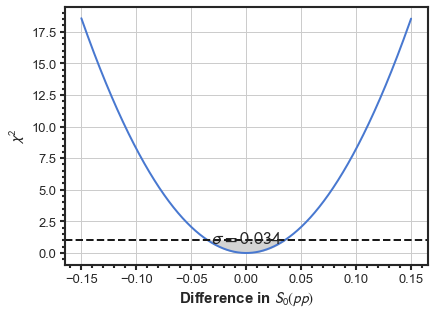

In [60]:
plt.plot(sigmas-base, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0(pp)$')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]-base))[:5] + r'$', ha='center')

plt.grid();

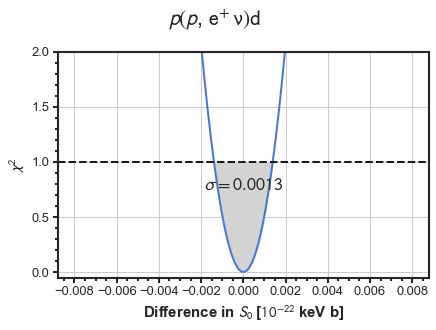

In [61]:
base = 0

ratename = r'$p(p$, $\rm{e}^{+}\,\nu)d$'
rate = 'r1'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.2
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)

r_mean = 4.01
r_std = 0.04
sigmas = sigmas * r_std #+ r_mean
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0$ [$10^{-22}$ keV b]')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:6] + r'$', ha='center')
plt.suptitle(ratename)

plt.ylim([-0.05, 2])

plt.grid();
plt.tight_layout()
plt.subplots_adjust(top=0.85)
#plt.savefig('S0diff_pp.pdf')

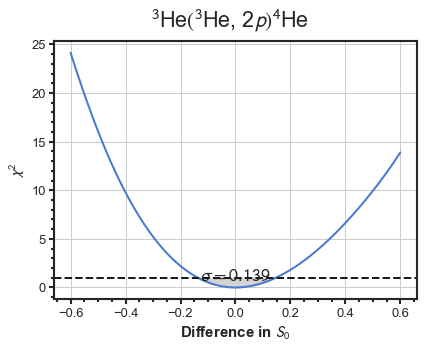

In [62]:
base = 0

ratename = r'$^3$He$(^3$He, 2$p)^4$He'
rate = 'r2'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.6
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)
plt.plot(sigmas-base, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0$')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]-base))[:5] + r'$', ha='center')
plt.suptitle(ratename)

plt.grid();
plt.show();

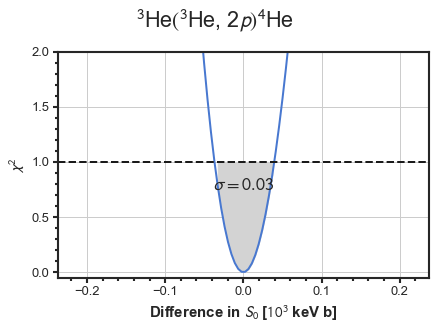

In [63]:
base = 0

ratename = r'$^3$He$(^3$He, 2$p)^4$He'
rate = 'r2'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.8
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)

r_mean = 5.21
r_std = 0.27
sigmas = sigmas * r_std
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0$ [$10^{3}$ keV b]')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:4] + r'$', ha='center')
plt.suptitle(ratename)

plt.ylim([-0.05, 2])

plt.grid();
plt.tight_layout()
plt.subplots_adjust(top=0.85)
#plt.savefig('S0diff_4He.pdf')

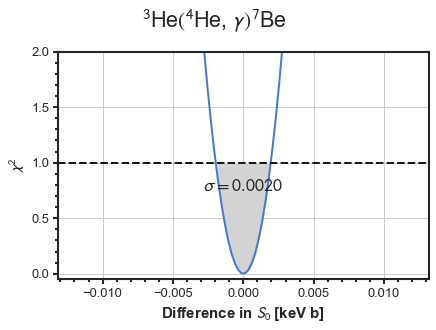

In [64]:
base = 0

ratename = r'$^3$He$(^4$He, $\gamma)^7$Be'
rate = 'r3'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.4
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)

r_mean = 0.56
r_std = 0.03
sigmas = sigmas * r_std 
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0$ [keV b]')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:6] + r'$', ha='center')
plt.suptitle(ratename)

plt.ylim([-0.05, 2])

plt.grid();
plt.tight_layout()
plt.subplots_adjust(top=0.85)
#plt.savefig('S0diff_7Be.pdf')

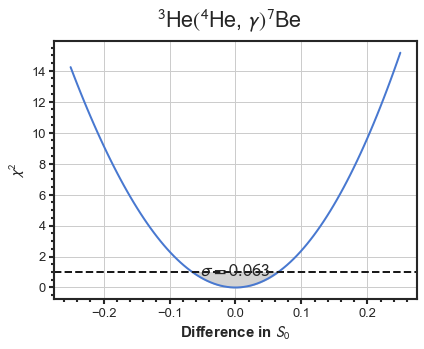

In [65]:
base = 0

ratename = r'$^3$He$(^4$He, $\gamma)^7$Be'
rate = 'r3'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.25
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)
plt.plot(sigmas-base, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0$')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]-base))[:5] + r'$', ha='center')
plt.suptitle(ratename)

plt.grid();
plt.show();

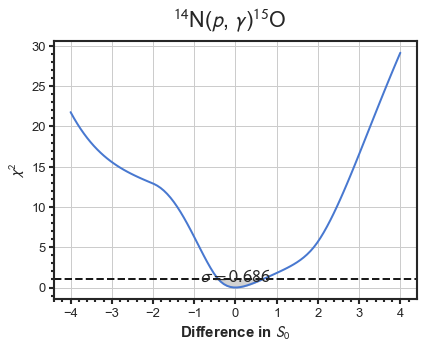

In [66]:
base = 0

ratename = r'$^{14}$N($p$, $\gamma$)$^{15}$O'

rate = 'r5'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 4
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)
plt.plot(sigmas-base, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'Difference in $S_0$')
plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 0.75, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]-base))[:5] + r'$', ha='center')
plt.suptitle(ratename)

plt.grid();
plt.show();

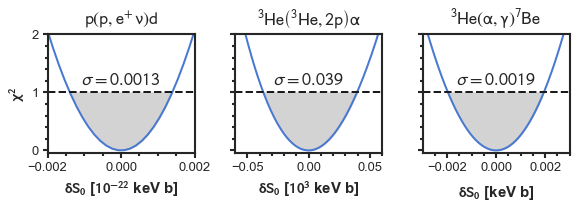

In [67]:
fig = plt.figure(figsize=(8.5,8.5/2.619))

plt.subplot(1,3,1)

base = 0

ratename = r'$\rm{p}\left(\rm{p}, \rm{e}^{+}\,\nu\right)d$'
rate = 'r1'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.2
sigmas = np.linspace(base-factor, base+factor, 100)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)

r_mean = 4.01
r_std = 0.04
sigmas = sigmas * r_std #+ r_mean
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\mathbf{\delta S_0}$ [$\mathbf{10^{-22}}$ keV b]')
plt.ylabel(r'$\mathbf{\chi^2}$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:6] + r'$', ha='center')
plt.gca().set_title(ratename)

plt.ylim([-0.05, 2])
plt.xlim([-0.002, 0.002])

#plt.grid()



plt.subplot(1,3,2)

ratename = r'$^3\rm{He}\left(^3\rm{He}, 2\rm{p}\right)\alpha$'
rate = 'r2'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.8
sigmas = np.linspace(base-factor, base+factor, 1000)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)

r_mean = 5.21
r_std = 0.27
sigmas = sigmas * r_std
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\mathbf{\delta S_0}$ [$\mathbf{10^{3}}$ keV b]')
#plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, s=r'$\sigma = ' + str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:5] + r'$', ha='center')
plt.gca().set_title(ratename)
plt.gca().set_yticklabels([])
plt.ylim([-0.05, 2])
plt.xlim([-0.06, 0.06])
#plt.grid()


plt.subplot(1,3,3)

ratename = r'$^3\rm{He}\left(\alpha, \gamma\right)^7\rm{Be}$'
rate = 'r3'

r02s_1s = rate_interp(rate, 'r02', base)(obs_r02s['freqs'])
r13s_1s = rate_interp(rate, 'r13', base)(obs_r13s['freqs'])
rs_1s = np.concatenate((r02s_1s, r13s_1s))

factor = 0.4
sigmas = np.linspace(base-factor, base+factor, 1000)
chi2s = []
for sigma in sigmas: 
    r02s_trial = rate_interp(rate, 'r02', sigma)(obs_r02s['freqs'])
    r13s_trial = rate_interp(rate, 'r13', sigma)(obs_r13s['freqs'])
    rs_trial = np.concatenate((r02s_trial, r13s_trial))
    resid = rs_1s - rs_trial
    chi2s += [np.dot(resid, np.dot(Sigma_inv, resid))]
chi2s = np.array(chi2s)

r_mean = 0.56
r_std = 0.03
sigmas = sigmas * r_std 
plt.plot(sigmas, chi2s)
plt.fill_between(sigmas[chi2s<=1]-base, 1, chi2s[chi2s<=1], color='lightgray')
plt.xlabel(r'$\mathbf{\delta S_0}$ [keV b]', labelpad=10)
#plt.ylabel(r'$\chi^2$')
plt.axhline(1, ls='--', c='k')

plt.text(0, 1.125, 
         s=r'$\sigma = ' + 
         str(np.abs(sigmas[np.argmin(np.abs(chi2s-1))]))[:6] + 
         r'$', ha='center')
plt.gca().set_title(ratename)
plt.ylim([-0.05, 2])
#plt.xlim([-0.01, 0.01])
plt.xlim([-0.003, 0.003])
plt.gca().set_yticklabels([])


#plt.grid();

plt.tight_layout()
plt.savefig('S0_diffs.pdf')

# Optimization & MCMC 

In [144]:
def lnprior(theta):
    #print("lnprior")
    _theta = np.copy(theta)
    #return 0.0 # flat prior 
    _lnprior = sp.stats.multivariate_normal.logpdf(
        _theta[:-2], mean=np.zeros(len(_theta[:-2])), cov=np.diag(np.ones(len(_theta[:-2]))))
    return _lnprior 

zeros_r02 = np.zeros(len(obs_r02s['freqs']))
zeros_r13 = np.zeros(len(obs_r13s['freqs']))

def lnlike(theta):
    _theta = np.copy(theta)
    sigma1, sigma2, sigma3, sigma5, offset1, offset2 = _theta
    
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            zeros = zeros_r02
            offset = offset1
        elif ratio_name == 'r13':
            zeros = zeros_r13
            offset = offset2
        points = zeros + offset
        for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid))
    return -chi2/2.

def lnprob(theta, i=0, N=0, size=0):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [155]:
theta = np.array([-3.07458708,  2.43030956, -5.0865922 ,  2.39746791, -0.01215471, -0.01262391]) #[0, 0, 0, 0, 0, 0]

ndim, nwalkers = len(theta), len(theta)*20
np.random.seed(0)
pos = np.array([[np.random.normal(theta[ii], 5 if ii < 4 else 0.01) 
                 for ii in range(ndim)]
       for jj in range(nwalkers)])

pos.shape

(120, 6)

In [145]:
sp.optimize.minimize(lambda x: -lnprob(x), x0=theta, method='Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 857.348057
         Iterations: 659
         Function evaluations: 1045


 final_simplex: (array([[-3.07458708,  2.43030956, -5.0865922 ,  2.39746791, -0.01215471,
        -0.01262391],
       [-3.07456622,  2.43033787, -5.08658071,  2.3973707 , -0.01215472,
        -0.0126239 ],
       [-3.07457725,  2.43033426, -5.08659261,  2.39740149, -0.0121547 ,
        -0.01262393],
       [-3.07458178,  2.43029302, -5.08657706,  2.39748613, -0.0121547 ,
        -0.0126239 ],
       [-3.0745791 ,  2.4303312 , -5.08659332,  2.39741111, -0.01215471,
        -0.01262395],
       [-3.07457802,  2.4303004 , -5.08657617,  2.39746447, -0.01215468,
        -0.0126239 ],
       [-3.07458791,  2.43028506, -5.08658061,  2.39751407, -0.01215472,
        -0.01262393]]), array([857.34805708, 857.34805709, 857.34805709, 857.34805709,
       857.34805709, 857.34805711, 857.34805711]))
           fun: 857.3480570813738
       message: 'Optimization terminated successfully.'
          nfev: 1045
           nit: 659
        status: 0
       success: True
             x: array([-3.074587

In [156]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, threads=4)
sampler.run_mcmc(pos, 1000, progress=True)

100%|██████████| 1000/1000 [11:25<00:00,  1.46it/s]


State([[-2.59452155e+00 -3.54069881e+00 -1.02882549e+01  1.52558136e+00
  -1.02167094e-02 -1.17408977e-02]
 [-2.65716394e+00 -3.99058128e+00 -1.08869102e+01  1.99608345e+00
  -1.01483338e-02 -1.18842812e-02]
 [-2.46885279e+00 -4.22430133e+00 -1.12811755e+01  2.15200007e+00
  -9.84005288e-03 -1.15197107e-02]
 [-2.19102450e+00 -3.59667460e+00 -1.13932288e+01  2.89086841e+00
  -9.63445456e-03 -1.13589335e-02]
 [-2.08246884e+00 -3.76178592e+00 -1.10978801e+01  5.43832285e-01
  -9.72585866e-03 -1.19009394e-02]
 [-1.98290723e+00 -3.30190004e+00 -1.15111878e+01  2.00424250e+00
  -9.40026900e-03 -1.15035998e-02]
 [-2.92024622e+00 -4.70589901e+00 -1.10103019e+01  9.01440445e-01
  -1.03292011e-02 -1.17181657e-02]
 [-2.59058210e+00 -3.30830516e+00 -1.06282445e+01  1.90299698e+00
  -1.03244487e-02 -1.20531992e-02]
 [-2.43102240e+00 -3.95921605e+00 -1.10014311e+01  9.65429353e-01
  -9.84972872e-03 -1.15826252e-02]
 [-2.82843248e+00 -4.78826282e+00 -1.14740332e+01  1.86635740e+00
  -9.98483163e-03 -

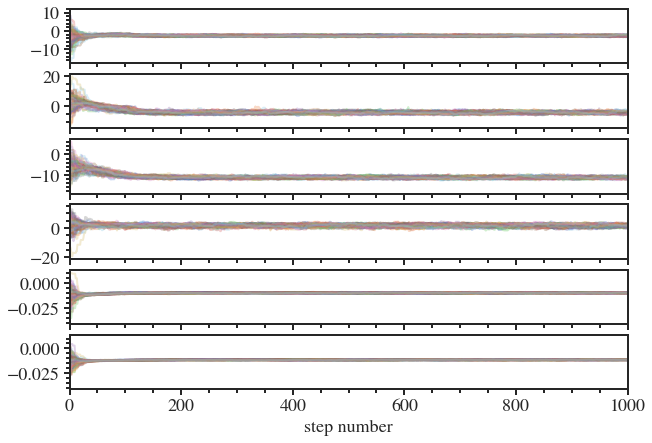

In [157]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
arr = sampler.chain
for i in range(ndim):
    ax = axes[i]
    for jj in range(arr.shape[0]):
        ax.plot(arr[jj, :, i], alpha=0.3)
    ax.set_xlim(0, arr.shape[1])
    #ax.set_ylabel(X_labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [158]:
arr = sampler.chain
arr = arr[:, -250:, :].reshape((-1, ndim))
#arr = arr.reshape((-1, ndim))
arr.shape

(30000, 6)

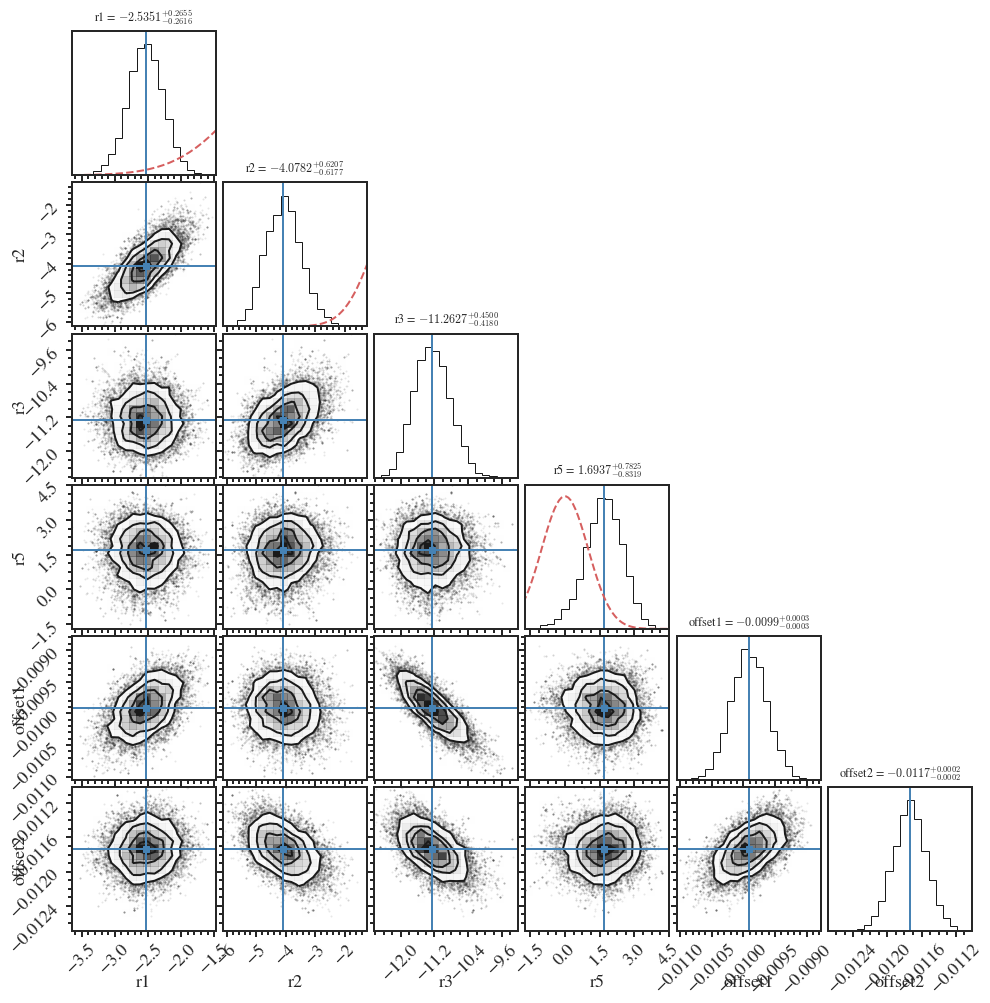

In [163]:
fig = corner.corner(arr, labels=['r1', 'r2', 'r3', 'r5', 'offset1', 'offset2'], 
    show_titles=True, title_fmt='.4f',
    #color='b',
    truths=np.percentile(arr, 50, axis=0),
    #range=[(X_min[i], X_max[i]) for i in range(len(X_labels))],
    #truth_color='b',
    title_kwargs={"fontsize": 12})

axes = np.array(fig.axes).reshape((arr.shape[1], arr.shape[1]))

for ii in range(len(axes)):
    if ii < 4:
        ax = axes[ii, ii]#axes[ii, ii]
        # plot priors 
        xs = np.linspace(-5, 5, num=100)
        ys = sp.stats.norm.pdf(xs, loc=0, scale=1)
        ymax = ax.get_ylim()[1]
        ax.plot(xs, ymax * ys/max(ys) * 0.92, 'r--')

#fig.tight_layout()
fig.savefig('mcmc.pdf')
fig.show()

# Analyze all solar models 

In [65]:
import tomso
from tomso import fgong

In [52]:
filenames = ['fobs_3He_eql_d_02c_eq.txt',
    'fobs_AGS05_d_21c.txt',
    'fobs_AGSS09_d_22c.txt',
    'fobs_Adelb11_d_34c.txt',
    'fobs_Age_d_06c.txt',
    'fobs_CM_d_24c.txt',
    'fobs_DVc_d_18c.txt',
    'fobs_Dc_d_17c.txt',
    'fobs_GS98_d_37c.txt',
    'fobs_L_s_d_41c.txt',
    'fobs_Liv05_d_40c.txt',
    'fobs_NACRE_d_39c.txt',
    'fobs_No_diff_03c.txt',
    'fobs_No_el_scrn_d_20c.txt',
    'fobs_OP05_d_36c.txt',
    'fobs_OPAL96_d_07c.txt',
    'fobs_Opc_6_5_d_16c.txt',
    'fobs_Opc_7_0_d_15c.txt',
    'fobs_R_s_d_05c.txt',
    'fobs_S_d_02c.txt',
    'fobs_Surf_opac_d_35c.txt']

In [53]:
models = []
model_r02s = []
model_r13s = []

for filename in filenames:
    rate_DF = pd.read_table('https://raw.githubusercontent.com/jcd11/LRSP_models/main/frequencies/'+filename, 
        sep='\s+', comment='#',
        names=['l', 'n', 'nu', 'E', 'n_p', 'n_g'])
    model_r02s += [r02(rate_DF)]
    model_r13s += [r13(rate_DF)]
    models += [rate_DF]

In [56]:
SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)

firsts = []
for ii, filename in enumerate(filenames):
    rate_r02s = model_r02s[ii]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    firsts += [-((interp-SSM)/SSM)[0]]

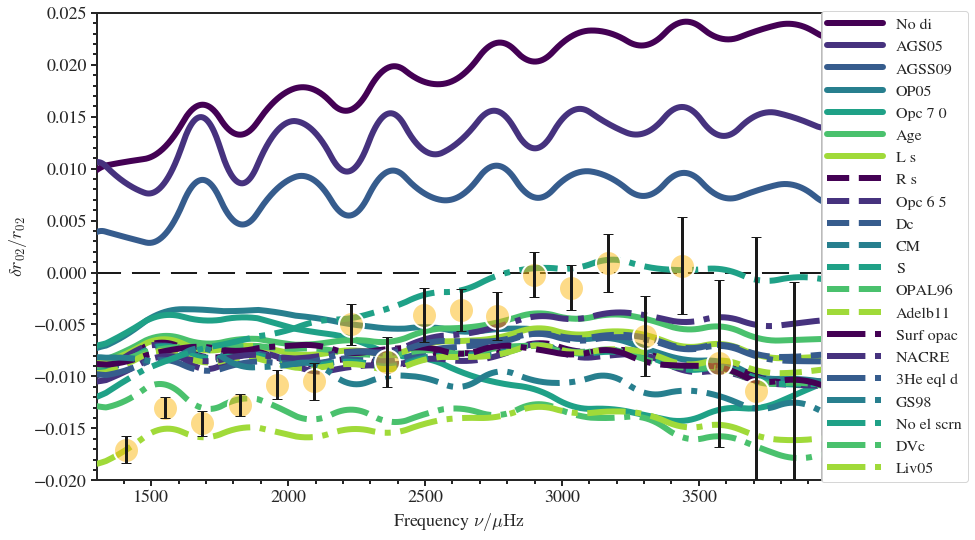

In [57]:
fig, ax = plt.subplots(figsize=(13,8.6))

norm2 = matplotlib.colors.Normalize(vmin=0, vmax=(len(filenames)//3))
cmap2 = matplotlib.cm.ScalarMappable(norm=norm2, cmap=matplotlib.cm.viridis)

firsts = []
for ii, filename in enumerate(filenames):
    rate_r02s = model_r02s[ii]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(1500)
    firsts += [-interp]
ordering = list(np.argsort(firsts))

for ii, jj in enumerate(ordering):
    filename = filenames[jj]
    rate_r02s = model_r02s[jj]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
    if ii >= 2*len(filenames)//3:
        style = '-.'
    elif ii >= len(filenames)//3:
        style = '--'
    else: 
        style = '-'
    plt.plot(freqs, (interp-SSM)/SSM, style, lw=6, zorder=3, label=' '.join(filename[5:-10].split('_')), 
             c=cmap2.to_rgba(ii%(len(filenames)//3)))

### plot solar data 
SSM_ = interp1d(r02s['freqs'], r02s['ratios'], kind=1, fill_value='extrapolate')(obs_r02s['freqs'])
obs_ = unumpy.uarray(obs_r02s['ratios'], std_r02s)
obs_ = (obs_-SSM_)/SSM_
plt.plot(obs_r02s['freqs'], [ob.n for ob in obs_], '.', ms=50, mew=2,
         markerfacecolor=matplotlib.colors.to_rgba('#FDB813', 0.5),
         markeredgecolor='white', zorder=100)
plt.errorbar(obs_r02s['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
             fmt='', c='k', ms=40, lw=0, elinewidth=3, zorder=101, capsize=5)

### SSM at y=0
plt.plot(freqs, (SSM-SSM)/SSM, 'k-')
plt.plot(-1, -1, 'k--', lw=2, zorder=1)
plt.plot(obs_r02s['freqs'], np.repeat(0, len(obs_r02s['freqs'])), 'w.', ms=20, zorder=2)

plt.plot(-1,-1, 'k-')

plt.legend(bbox_to_anchor=(1.1, 0.5), loc='center', handlelength=3.5)

#ax.set_rasterization_zorder(9999)
plt.ylim([-0.02, 0.025])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')
plt.ylabel(r'$\delta r_{02} / r_{02}$')

filename = 'S02_r02_all'
#plt.savefig(filename + '.png', bbox_inches='tight', dpi=400)
plt.show()

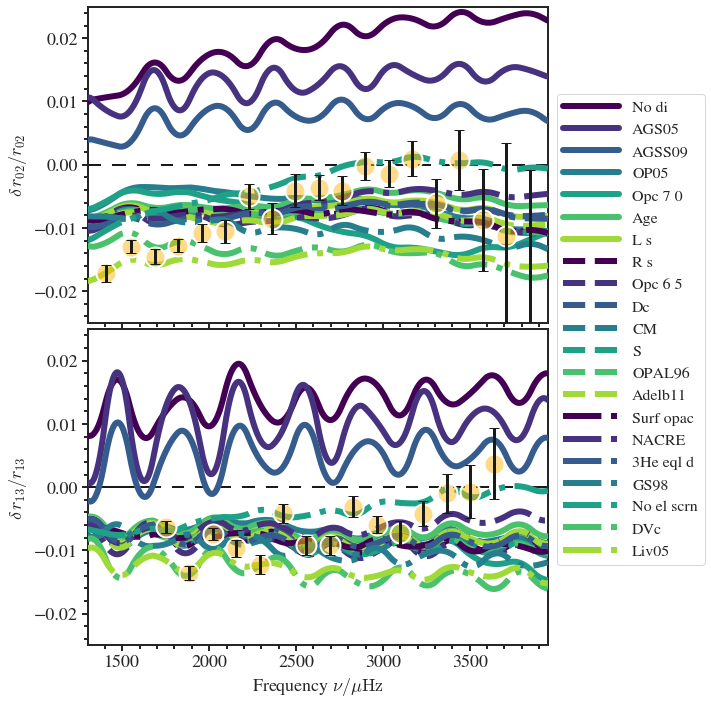

In [58]:
#SSM = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
SSM_r02 = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(freqs)
SSM_r13 = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(freqs)

SSM_r02_ = interp1d(r02s['freqs'], r02s['ratios'], kind=2, fill_value='extrapolate')(obs_r02s['freqs'])
SSM_r13_ = interp1d(r13s['freqs'], r13s['ratios'], kind=2, fill_value='extrapolate')(obs_r13s['freqs'])

norm2 = matplotlib.colors.Normalize(vmin=0, vmax=(len(filenames)//3))
cmap2 = matplotlib.cm.ScalarMappable(norm=norm2, cmap=matplotlib.cm.viridis)

firsts = []
for ii, filename in enumerate(filenames):
    rate_r02s = model_r02s[ii]
    interp = interp1d(rate_r02s['freqs'], rate_r02s['ratios'], kind=2, fill_value='extrapolate')(1500)
    firsts += [-interp]
ordering = list(np.argsort(firsts))

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8.25, 11.75))
axes = ax.flatten()

counter = 0
for ratio_name in ['r02', 'r13']:
    if ratio_name == 'r02':
        ratio = r02
        ratios = r02s
        obs_ratios = obs_r02s
        std = std_r02s
        SSM = SSM_r02
        SSM_ = SSM_r02_
        latex = r'r_{02}'
        model_ratios = model_r02s
    elif ratio_name == 'r13':
        ratio = r13
        ratios = r13s
        obs_ratios = obs_r13s
        std = std_r13s
        SSM = SSM_r13
        SSM_ = SSM_r13_
        latex = r'r_{13}'
        model_ratios = model_r13s
    ax = axes[counter]
    counter += 1
    
    ax.set_ylabel(r'$\delta\,'+latex+r'/'+latex+'$')
    
    for ii, jj in enumerate(ordering):
        filename = filenames[jj]
        #rate_r02s = model_r02s[jj]
        interp = interp1d(model_ratios[jj]['freqs'], model_ratios[jj]['ratios'], kind=2, fill_value='extrapolate')(freqs)
        if ii >= 2*len(filenames)//3:
            style = '-.'
        elif ii >= len(filenames)//3:
            style = '--'
        else: 
            style = '-'
        ax.plot(freqs, (interp-SSM)/SSM, style, lw=6, zorder=3, label=' '.join(filename[5:-10].split('_')), 
                 c=cmap2.to_rgba(ii%(len(filenames)//3)))
    
    ### plot solar data 
    SSM_ = interp1d(ratios['freqs'], ratios['ratios'], kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
    obs_ = unumpy.uarray(obs_ratios['ratios'], std)
    obs_ = (obs_-SSM_)/SSM_
    ax.plot(obs_ratios['freqs'], [ob.n for ob in obs_], '.', ms=40, mew=2,
             markerfacecolor=matplotlib.colors.to_rgba('#FDB813', 0.5),
             markeredgecolor='white', zorder=100)
    ax.errorbar(obs_ratios['freqs'], [ob.n for ob in obs_], yerr=[ob.std_dev for ob in obs_], xerr=0, 
                 fmt='', c='k', ms=40, lw=0, elinewidth=3, zorder=101, capsize=5)
    
    ### SSM at y=0
    ax.plot(freqs, (SSM-SSM)/SSM, 'k-')
    ax.plot(-1, -1, 'k--', lw=2, zorder=1)
    ax.plot(obs_ratios['freqs'], np.repeat(0, len(obs_ratios['freqs'])), 'w.', ms=20, zorder=2)
    
    ax.plot(-1,-1, 'k-')

#ax.set_rasterization_zorder(9999)
plt.ylim([-0.025, 0.025])
plt.xlim([1300, 3950])
plt.xlabel(r'Frequency $\nu/\mu\rm{Hz}$')

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.legend(bbox_to_anchor=(1.18, 1), loc='center', handlelength=3.5)

plt.subplots_adjust(wspace=0.03, hspace=0.02)

filename = 'all_solar_models_ratios'
plt.savefig(filename + '.pdf', bbox_inches='tight', dpi=400);
#plt.show()

In [274]:
for ii, jj in enumerate(ordering):
    
    filename = filenames[jj]
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            model_ratios = model_r02s
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            model_ratios = model_r13s
    
        interp = interp1d(model_ratios[jj]['freqs'], 
                          model_ratios[jj]['ratios'], 
                          kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        points = (interp-SSM_)/SSM_
        #for rate, sigma in zip(['r1', 'r2', 'r3', 'r5'], [sigma1, sigma2, sigma3, sigma5]):
        #    points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    
    resid = rel_ratios_obs - np.array(all_ratios)
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid)) / len(all_ratios)
    print(' '.join(filename[5:-10].split('_')).ljust(12), r'𝛘² = ' + '{:.4f}'.format(chi2))

No di        𝛘² = 2561.9567
AGS05        𝛘² = 1875.8677
AGSS09       𝛘² = 1078.1544
OP05         𝛘² = 199.6571
Opc 7 0      𝛘² = 235.3426
Age          𝛘² = 124.6826
L s          𝛘² = 121.7451
R s          𝛘² = 125.6310
Opc 6 5      𝛘² = 124.4345
Dc           𝛘² = 108.9663
CM           𝛘² = 122.2488
S            𝛘² = 124.3543
OPAL96       𝛘² = 131.0052
Adelb11      𝛘² = 112.2194
Surf opac    𝛘² = 127.8099
NACRE        𝛘² = 86.2156
3He eql d    𝛘² = 92.4471
GS98         𝛘² = 165.5858
No el scrn   𝛘² = 111.7514
DVc          𝛘² = 217.4427
Liv05        𝛘² = 215.0512


In [320]:
def lnprior(theta):
    return sp.stats.multivariate_normal.logpdf(theta[:4], 
        mean=theta_zeros, cov=theta_cov)

def lnlike(theta):
    sigma1, sigma2, sigma3, sigma5, offset1, offset2 = theta
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            points = zeros_r02 + offset1
        elif ratio_name == 'r13':
            points = zeros_r13 + offset2
        for rate, sigma in zip(['r1',   'r2',   'r3',   'r5'], 
                               [sigma1, sigma2, sigma3, sigma5]):
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid))
    return -chi2 / (len(rel_ratios_obs) - 6) #/2.

def get_chi2(theta):
    sigma1, sigma2, sigma3, sigma5, offset1, offset2 = theta
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            points = zeros_r02 + offset1
        elif ratio_name == 'r13':
            points = zeros_r13 + offset2
        for rate, sigma in zip(['r1',   'r2',   'r3',   'r5'], 
                               [sigma1, sigma2, sigma3, sigma5]):
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid)) / (len(rel_ratios_obs) - 6)
    return chi2

def lnprob(theta, i=0, N=0, size=0):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [323]:
zeros_r02 = np.zeros(len(obs_r02s['freqs']))
zeros_r13 = np.zeros(len(obs_r13s['freqs']))

for ii, jj in enumerate(ordering):
    
    filename = filenames[jj]
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            model_ratios = model_r02s
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            model_ratios = model_r13s
        
        interp = interp1d(model_ratios[jj]['freqs'], 
                          model_ratios[jj]['ratios'], 
                          kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        points = (interp-SSM_)/SSM_
        all_ratios += list(points)
        
        if ratio_name == 'r02':
            zeros_r02 = points
        elif ratio_name == 'r13':
            zeros_r13 = points
    
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid)) / len(all_ratios)
    
    opt = sp.optimize.minimize(lambda x: -lnprob(x), x0=[0,0,0,0,0,0], method='Nelder-Mead', options={'maxiter': 10**5}).x
    chi2_opt = get_chi2(opt)
    
    print(' '.join(filename[5:-10].split('_')).ljust(12), 
          r'𝛘² = {:.4f}'.format(chi2), '\t',
          r'opt 𝛘² = {:.4f}'.format(chi2_opt))

zeros_r02 = np.zeros(len(obs_r02s['freqs']))
zeros_r13 = np.zeros(len(obs_r13s['freqs']))

No di        𝛘² = 2561.9567 	 opt 𝛘² = 83.5990
AGS05        𝛘² = 1875.8677 	 opt 𝛘² = 159.2766
AGSS09       𝛘² = 1078.1544 	 opt 𝛘² = 105.4174
OP05         𝛘² = 199.6571 	 opt 𝛘² = 61.0891
Opc 7 0      𝛘² = 235.3426 	 opt 𝛘² = 97.2974
Age          𝛘² = 124.6826 	 opt 𝛘² = 49.3036
L s          𝛘² = 121.7451 	 opt 𝛘² = 49.1893
R s          𝛘² = 125.6310 	 opt 𝛘² = 49.5947
Opc 6 5      𝛘² = 124.4345 	 opt 𝛘² = 49.9518
Dc           𝛘² = 108.9663 	 opt 𝛘² = 53.3201
CM           𝛘² = 122.2488 	 opt 𝛘² = 61.7896
S            𝛘² = 124.3543 	 opt 𝛘² = 50.8493
OPAL96       𝛘² = 131.0052 	 opt 𝛘² = 56.9215
Adelb11      𝛘² = 112.2194 	 opt 𝛘² = 49.8740
Surf opac    𝛘² = 127.8099 	 opt 𝛘² = 58.3300
NACRE        𝛘² = 86.2156 	 opt 𝛘² = 85.7618
3He eql d    𝛘² = 92.4471 	 opt 𝛘² = 45.6553
GS98         𝛘² = 165.5858 	 opt 𝛘² = 75.6774
No el scrn   𝛘² = 111.7514 	 opt 𝛘² = 53.2547
DVc          𝛘² = 217.4427 	 opt 𝛘² = 46.4486
Liv05        𝛘² = 215.0512 	 opt 𝛘² = 46.9291


In [324]:
theta_zeros = np.zeros(4)
theta_cov = np.diag(np.ones(4))

def lnprior(theta):
    return sp.stats.multivariate_normal.logpdf(theta, 
        mean=theta_zeros, cov=theta_cov)

def lnlike(theta):
    sigma1, sigma2, sigma3, sigma5 = theta
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            points = zeros_r02
        elif ratio_name == 'r13':
            points = zeros_r13
        for rate, sigma in zip(['r1',   'r2',   'r3',   'r5'], 
                               [sigma1, sigma2, sigma3, sigma5]):
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid))
    return -chi2/2.

def get_chi2(theta):
    sigma1, sigma2, sigma3, sigma5 = theta
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            points = zeros_r02
        elif ratio_name == 'r13':
            points = zeros_r13
        for rate, sigma in zip(['r1',   'r2',   'r3',   'r5'], 
                               [sigma1, sigma2, sigma3, sigma5]):
            points += rate_interp_points(rate, ratio_name, sigma)
        all_ratios += list(points)
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid)) / (len(rel_ratios_obs) - 4)
    return chi2

def lnprob(theta, i=0, N=0, size=0):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [329]:
zeros_r02 = np.zeros(len(obs_r02s['freqs']))
zeros_r13 = np.zeros(len(obs_r13s['freqs']))

for ii, jj in enumerate(ordering):
    
    filename = filenames[jj]
    all_ratios = []
    for ratio_name in ['r02', 'r13']:
        if ratio_name == 'r02':
            ratio = r02
            ratios = r02s
            obs_ratios = obs_r02s
            std = std_r02s
            SSM = SSM_r02
            SSM_ = SSM_r02_
            latex = r'r_{02}'
            model_ratios = model_r02s
        elif ratio_name == 'r13':
            ratio = r13
            ratios = r13s
            obs_ratios = obs_r13s
            std = std_r13s
            SSM = SSM_r13
            SSM_ = SSM_r13_
            latex = r'r_{13}'
            model_ratios = model_r13s
        
        interp = interp1d(model_ratios[jj]['freqs'], 
                          model_ratios[jj]['ratios'], 
                          kind=2, fill_value='extrapolate')(obs_ratios['freqs'])
        points = (interp-SSM_)/SSM_
        all_ratios += list(points)
        
        if ratio_name == 'r02':
            zeros_r02 = points
        elif ratio_name == 'r13':
            zeros_r13 = points
    
    resid = np.array(all_ratios) - rel_ratios_obs
    chi2 = np.dot(resid, np.dot(Sigma_inv, resid)) / len(all_ratios)
    
    opt = sp.optimize.minimize(lambda x: -lnprob(x), x0=[0,0,0,0], method='Nelder-Mead', options={'maxiter': 10**4})
    if opt.success is False:
        continue 
    chi2_opt = get_chi2(opt.x)
    
    print(' '.join(filename[5:-10].split('_')).ljust(12), 
          r'𝛘² = {:.4f}'.format(chi2), '\t',
          r'opt 𝛘² = {:.4f}'.format(chi2_opt))

zeros_r02 = np.zeros(len(obs_r02s['freqs']))
zeros_r13 = np.zeros(len(obs_r13s['freqs']))

## Compare Internal Structures

In [72]:
gong = fgong.load_fgong('https://raw.githubusercontent.com/jcd11/LRSP_models/main/models/fgong_3He_eql_d_02c_eq.txt')

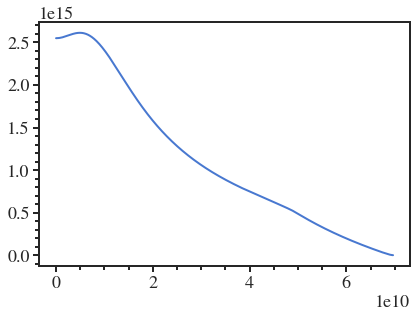

In [77]:
plt.plot(gong.r, gong.cs2)
plt.show()

In [80]:
gongs = []
for filename in filenames:
    fname = 'fgong' + filename[4:]
    gongs += [fgong.load_fgong('https://raw.githubusercontent.com/jcd11/LRSP_models/main/models/' + fname)]

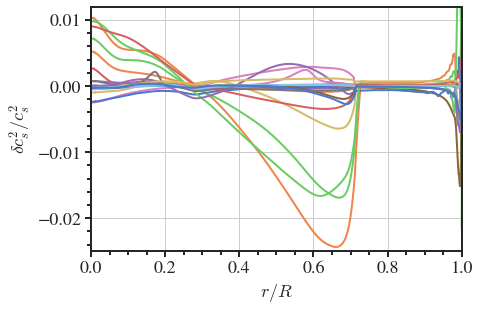

In [93]:
fig, ax = plt.subplots(figsize=(13,8.6))

norm2 = matplotlib.colors.Normalize(vmin=0, vmax=(len(filenames)//3))
cmap2 = matplotlib.cm.ScalarMappable(norm=norm2, cmap=matplotlib.cm.viridis)

for gong in gongs:
    if gong == gongs[0]:
        SSM = gong
        xs = gong.x
    cs2 = interp1d(gong.x, gong.cs2, kind=2, fill_value='extrapolate')(xs)
    plt.plot(xs, (cs2-SSM.cs2)/SSM.cs2)
plt.ylim([-0.025, 0.012])
plt.xlim([0, 1])
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\delta c_s^2/c_s^2$')
plt.grid();

In [118]:
Basu2009_data = """x c sigma_c x_rho rho sigma_rho
6.1949E-02 5.1170E+07 9.2178E+03 5.8884E-02 1.2078E+02 1.1601E-01
7.4948E-02 5.1169E+07 4.3834E+03 7.7225E-02 1.0532E+02 7.7585E-02
1.0052E-01 5.0803E+07 4.9108E+03 1.0208E-01 8.5937E+01 5.1525E-02
1.2733E-01 4.9858E+07 4.4274E+03 1.2706E-01 6.9226E+01 3.1670E-02
1.5208E-01 4.8559E+07 4.4193E+03 1.5162E-01 5.5510E+01 2.0105E-02
1.7636E-01 4.7033E+07 3.5829E+03 1.7709E-01 4.3772E+01 1.2053E-02
2.0184E-01 4.5316E+07 3.4470E+03 2.0233E-01 3.4221E+01 6.9189E-03
2.2746E-01 4.3569E+07 3.0592E+03 2.2730E-01 2.6514E+01 4.6064E-03
2.5253E-01 4.1897E+07 2.8858E+03 2.5277E-01 2.0234E+01 4.3910E-03
2.7771E-01 4.0301E+07 2.5884E+03 2.7803E-01 1.5355E+01 4.5718E-03
3.0320E-01 3.8798E+07 2.4506E+03 3.0333E-01 1.1570E+01 3.9911E-03
3.2847E-01 3.7395E+07 2.3018E+03 3.2879E-01 8.6838E+00 3.2633E-03
3.5370E-01 3.6090E+07 2.1119E+03 3.5403E-01 6.5346E+00 2.5846E-03
3.7912E-01 3.4866E+07 1.9529E+03 3.7946E-01 4.9123E+00 1.9819E-03
4.0439E-01 3.3710E+07 1.8638E+03 4.0474E-01 3.7160E+00 1.5338E-03
4.2970E-01 3.2629E+07 1.7383E+03 4.3006E-01 2.8201E+00 1.1410E-03
4.5504E-01 3.1604E+07 1.6411E+03 4.5535E-01 2.1521E+00 8.9351E-04
4.8031E-01 3.0634E+07 1.5152E+03 4.8063E-01 1.6517E+00 6.7778E-04
5.0566E-01 2.9712E+07 1.4385E+03 5.0592E-01 1.2737E+00 5.4124E-04
5.3096E-01 2.8822E+07 1.3808E+03 5.3121E-01 9.8850E-01 4.1931E-04
5.5630E-01 2.7972E+07 1.3146E+03 5.5651E-01 7.7054E-01 3.3861E-04
5.8160E-01 2.7130E+07 1.2604E+03 5.8181E-01 6.0445E-01 2.6438E-04
6.0693E-01 2.6311E+07 1.1919E+03 6.0711E-01 4.7634E-01 2.1495E-04
6.3223E-01 2.5483E+07 1.1390E+03 6.3243E-01 3.7756E-01 1.6995E-04
6.5754E-01 2.4637E+07 1.0619E+03 6.5772E-01 3.0095E-01 1.4047E-04
6.8283E-01 2.3706E+07 1.0045E+03 6.8304E-01 2.4197E-01 1.1334E-04
7.0811E-01 2.2614E+07 9.3680E+02 7.0838E-01 1.9685E-01 9.3937E-05
7.3337E-01 2.1257E+07 8.9853E+02 7.3371E-01 1.6281E-01 7.8683E-05
7.5869E-01 1.9881E+07 8.7096E+02 7.5903E-01 1.3311E-01 6.5124E-05
7.8404E-01 1.8495E+07 7.7763E+02 7.8435E-01 1.0703E-01 5.4001E-05
8.0934E-01 1.7089E+07 7.3027E+02 8.0967E-01 8.4315E-02 4.3385E-05
8.3464E-01 1.5649E+07 6.8648E+02 8.3499E-01 6.4667E-02 3.4486E-05
8.5995E-01 1.4156E+07 6.1451E+02 8.6031E-01 4.7800E-02 2.6671E-05
8.8527E-01 1.2582E+07 5.7896E+02 8.8564E-01 3.3507E-02 1.9704E-05
9.1060E-01 1.0881E+07 5.9297E+02 9.1096E-01 2.1657E-02 1.4339E-05
9.3590E-01 8.9771E+06 5.5548E+02 9.3628E-01 1.2157E-02 9.5495E-06
9.5661E-01 7.1388E+06 4.9286E+02 9.5754E-01 5.9835E-03 6.2548E-06"""

In [119]:
Basu2009_DF = pd.DataFrame([x.split() for x in Basu2009_data.split('\n')[1:]], 
                   columns=[x for x in Basu2009_data.split('\n')[0].split()])
Basu2009_DF

,x,c,sigma_c,x_rho,rho,sigma_rho
0,6.1949E-02,5.1170E+07,9.2178E+03,5.8884E-02,1.2078E+02,1.1601E-01
1,7.4948E-02,5.1169E+07,4.3834E+03,7.7225E-02,1.0532E+02,7.7585E-02
2,1.0052E-01,5.0803E+07,4.9108E+03,1.0208E-01,8.5937E+01,5.1525E-02
3,1.2733E-01,4.9858E+07,4.4274E+03,1.2706E-01,6.9226E+01,3.1670E-02
4,1.5208E-01,4.8559E+07,4.4193E+03,1.5162E-01,5.5510E+01,2.0105E-02
5,1.7636E-01,4.7033E+07,3.5829E+03,1.7709E-01,4.3772E+01,1.2053E-02
6,2.0184E-01,4.5316E+07,3.4470E+03,2.0233E-01,3.4221E+01,6.9189E-03
7,2.2746E-01,4.3569E+07,3.0592E+03,2.2730E-01,2.6514E+01,4.6064E-03
8,2.5253E-01,4.1897E+07,2.8858E+03,2.5277E-01,2.0234E+01,4.3910E-03
9,2.7771E-01,4.0301E+07,2.5884E+03,2.7803E-01,1.5355E+01,4.5718E-03


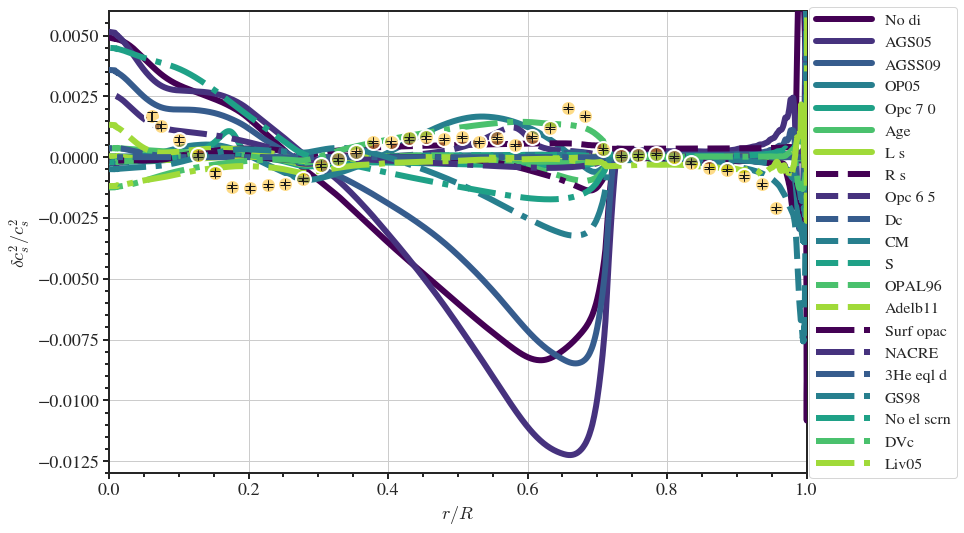

In [177]:
fig, ax = plt.subplots(figsize=(12.5,8.5))

norm2 = matplotlib.colors.Normalize(vmin=0, vmax=(len(filenames)//3))
cmap2 = matplotlib.cm.ScalarMappable(norm=norm2, cmap=matplotlib.cm.viridis)

for ii, jj in enumerate(ordering):
    filename = filenames[jj]
    gong = gongs[jj]
    cs = interp1d(gong.x, gong.cs, kind=2, fill_value='extrapolate')(xs)
    if ii >= 2*len(filenames)//3:
        style = '-.'
    elif ii >= len(filenames)//3:
        style = '--'
    else: 
        style = '-'
    plt.plot(xs, (cs-SSM.cs)/SSM.cs, style, lw=6, zorder=3, label=' '.join(filename[5:-10].split('_')), 
             c=cmap2.to_rgba(ii%(len(filenames)//3)))

SSM_ = interp1d(SSM.x, SSM.cs, kind=2, fill_value='extrapolate')
for _, row in Basu2009_DF.iterrows():
    x = float(row['x'])
    dc = (ufloat(float(row['c']),float(row['sigma_c']))-SSM_(x))/SSM_(x)
    plt.plot(x, dc.n, 
         '.', ms=30, mew=2,
         markerfacecolor=matplotlib.colors.to_rgba('#FDB813', 0.5),
         markeredgecolor='white', zorder=100)
    plt.errorbar(x, dc.n, yerr=dc.std_dev, xerr=0, 
             fmt='', c='k', ms=40, lw=2, elinewidth=2, zorder=101, capsize=5)

plt.ylim([-0.013, 0.006])
plt.xlim([0, 1])
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\delta c_s^2/c_s^2$')
plt.grid()

plt.plot(-1,-1, 'k-')

plt.legend(bbox_to_anchor=(1.11, 0.5), loc='center', handlelength=3.5)
plt.show()

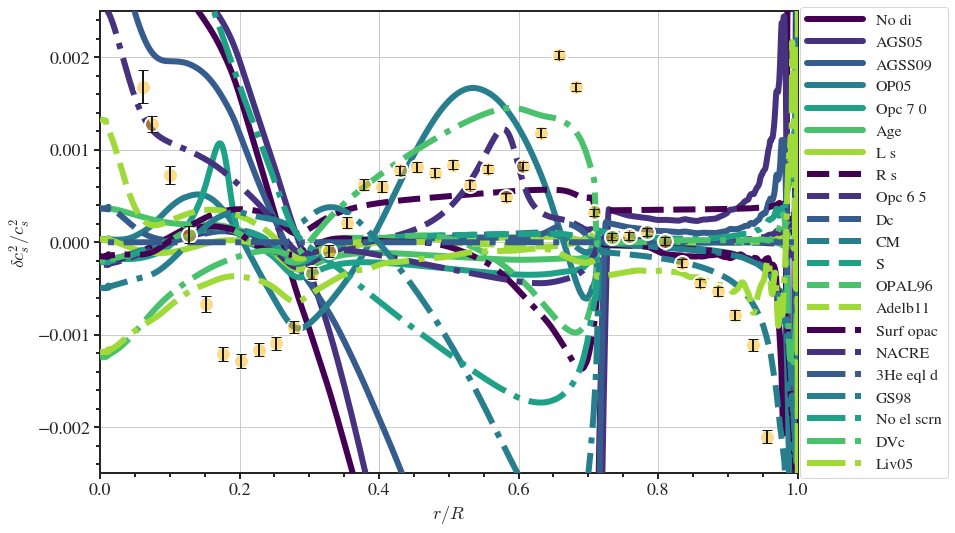

In [175]:
fig, ax = plt.subplots(figsize=(12.5,8.5))

norm2 = matplotlib.colors.Normalize(vmin=0, vmax=(len(filenames)//3))
cmap2 = matplotlib.cm.ScalarMappable(norm=norm2, cmap=matplotlib.cm.viridis)

for ii, jj in enumerate(ordering):
    filename = filenames[jj]
    gong = gongs[jj]
    cs = interp1d(gong.x, gong.cs, kind=2, fill_value='extrapolate')(xs)
    if ii >= 2*len(filenames)//3:
        style = '-.'
    elif ii >= len(filenames)//3:
        style = '--'
    else: 
        style = '-'
    plt.plot(xs, (cs-SSM.cs)/SSM.cs, style, lw=6, zorder=3, label=' '.join(filename[5:-10].split('_')), 
             c=cmap2.to_rgba(ii%(len(filenames)//3)))

SSM_ = interp1d(SSM.x, SSM.cs, kind=2, fill_value='extrapolate')
for _, row in Basu2009_DF.iterrows():
    x = float(row['x'])
    dc = (ufloat(float(row['c']),float(row['sigma_c']))-SSM_(x))/SSM_(x)
    plt.plot(x, dc.n, 
         '.', ms=30, mew=2,
         markerfacecolor=matplotlib.colors.to_rgba('#FDB813', 0.5),
         markeredgecolor='white', zorder=100)
    plt.errorbar(x, dc.n, yerr=dc.std_dev, xerr=0, 
             fmt='', c='k', ms=40, lw=2, elinewidth=2, zorder=101, capsize=5)

plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1])
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\delta c_s^2/c_s^2$')
plt.grid()

plt.plot(-1,-1, 'k-')

plt.legend(bbox_to_anchor=(1.11, 0.5), loc='center', handlelength=3.5)
plt.show()